## Online News Popularity - ONP


1. Importing Libraries 
2. Importing the dataset 
3. Exploratory Data Analysis 
4. Dataset attribute formatting 
5. Building Models 
6. Analyzing Results 

### Libraries 

In [88]:
#Mounting google drive for loading the data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# Importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatche
from sklearn import metrics

### Read the csv file into a ONP

In [90]:
ONP = pd.read_csv('/content/drive/Shareddrives/IDS575_ML/FinalProject/Data/OnlineNewsPopularity.csv')

In [91]:
ONP.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Exploratrory Data Analysis 

In [92]:
# Checking the dimensions of the data 
print("Dimensions of the dataset - ".format(ONP.shape[0], ONP.shape[1]))

Dimensions of the dataset - 


In [93]:
ONP.shape

(39644, 61)

The data has 39k rows while 61 columns. We will go ahead and check for null values in the columns. 

In [94]:
# Checking the null values 
ONP.isna().sum().sort_values(ascending=False)

url                           0
 weekday_is_monday            0
 weekday_is_wednesday         0
 weekday_is_thursday          0
 weekday_is_friday            0
                             ..
 kw_min_avg                   0
 kw_max_avg                   0
 kw_avg_avg                   0
 self_reference_min_shares    0
 shares                       0
Length: 61, dtype: int64

We see that there null values in any of the columns.

In [95]:
# Max/Min values at each of the column
ONP.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [96]:
# Columns present in the dataset
ONP.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [97]:
# Remove empty spaces in the column names
ONP.columns = ONP.columns.str.replace(" ","")

In [98]:
## Unique values of each of the column
print('Unique Values - ')
for col in ONP:
    print(col,':',ONP[col].unique(), '\n')

Unique Values - 
url : ['http://mashable.com/2013/01/07/amazon-instant-video-browser/'
 'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/'
 'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/' ...
 'http://mashable.com/2014/12/27/son-pays-off-mortgage/'
 'http://mashable.com/2014/12/27/ukraine-blasts/'
 'http://mashable.com/2014/12/27/youtube-channels-2015/'] 

timedelta : [731. 730. 729. 728. 727. 726. 725. 724. 723. 722. 721. 720. 719. 718.
 717. 716. 715. 714. 713. 712. 711. 710. 709. 708. 707. 706. 705. 704.
 703. 702. 701. 700. 699. 698. 697. 696. 695. 694. 693. 692. 691. 690.
 689. 688. 687. 686. 685. 684. 683. 682. 681. 680. 679. 678. 677. 676.
 675. 674. 673. 672. 671. 670. 669. 668. 667. 666. 665. 664. 663. 662.
 661. 660. 659. 658. 657. 656. 655. 654. 653. 652. 651. 650. 649. 648.
 647. 646. 645. 644. 643. 642. 641. 640. 639. 638. 637. 636. 635. 634.
 633. 632. 631. 630. 629. 628. 627. 626. 625. 624. 623. 622. 621. 620.
 619. 618. 617. 616. 615. 614. 61

There are no duplicate values present in the dataset

In [99]:
#Understanding target variable distribution
ONP['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

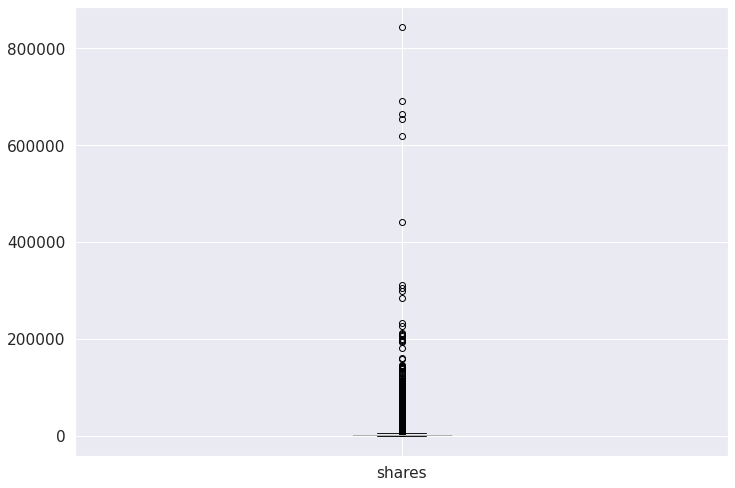

In [100]:
#Understanding target variable distribution
ONP.boxplot(column='shares')

In [101]:
# Quantiles 
ONP['shares'].quantile(q=[.1, .2, .3, .4, .5, .6, .7, .8, .9,1.0])

0.1       708.0
0.2       870.6
0.3      1000.0
0.4      1200.0
0.5      1400.0
0.6      1800.0
0.7      2300.0
0.8      3400.0
0.9      6200.0
1.0    843300.0
Name: shares, dtype: float64

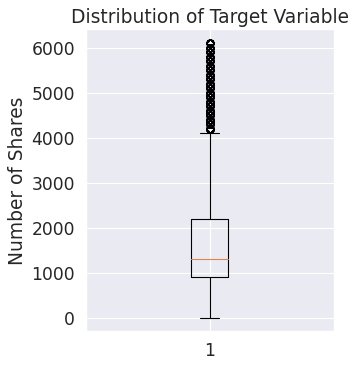

<Figure size 842.4x595.44 with 0 Axes>

In [102]:
# Filtering data to show the boxplot 
figure(figsize=(4, 5), dpi=80)
plt.ylabel(ylabel='Number of Shares')
plt.boxplot(ONP[ONP['shares'] <=6100]['shares'])
plt.title("Distribution of Target Variable")
plt.show()
plt.savefig('Distribution_Shares.png')

In [103]:
# To convert this problem into a classification problem - Threshold selected 1500 (Closer to 50th percentile)

ONP['shares_2_cat'] = ONP['shares'].apply(lambda x: 0 if x <1500 else 1)


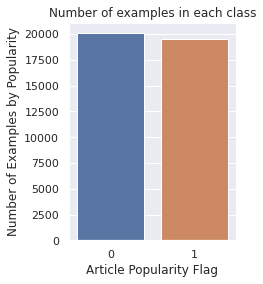

In [104]:
sns.set(rc={'figure.figsize':(3,4)})
ax=sns.countplot(ONP['shares_2_cat'])
ax.set(xlabel='Article Popularity Flag', ylabel='Number of Examples by Popularity')
plt.title('Number of examples in each class')
plt.show()

In [105]:
# Creating multiclass of Output variable 

conditions = [
    (ONP['shares'] < 650),
    (ONP['shares'] < 1000), 
    (ONP['shares'] < 4000),
    (ONP['shares'] < 50000),
    (ONP['shares'] < 943300)
    ]

values = ['very_low','low','medium','high', 'very_high']

ONP['shares_4_cat'] = np.select(conditions, values)

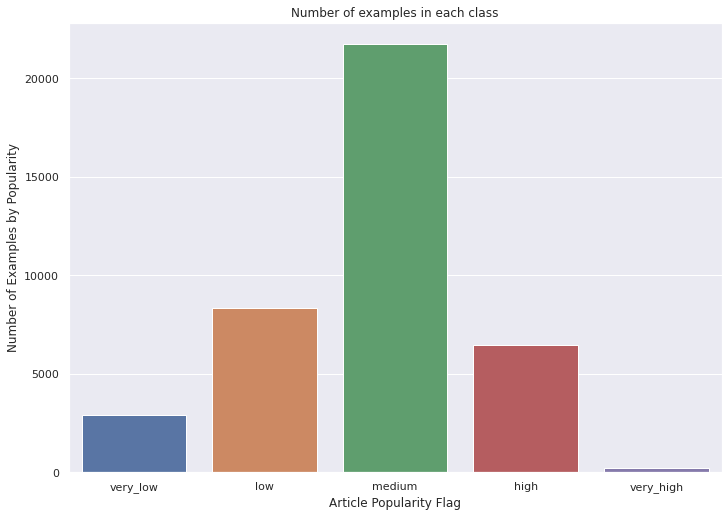

In [106]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.countplot(ONP['shares_4_cat'])
ax.set(xlabel='Article Popularity Flag', ylabel='Number of Examples by Popularity')
plt.title('Number of examples in each class')
plt.show()

- 2 Class problems - Binary Classification 

Classes are equally divided, there isnt any class imbalance. This type of balanced dataset imposes less challenges when building ML models over them.

- A classification task with more than two classes - Multiclass Classification, Imbalanced dataset 

Classification problems having multiple classes with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes many conventional machine learning algorithms less effective, especially in predicting minority class examples. In order to do so, let us first understand the problem at hand and then discuss the ways to overcome those.

Imbalanced Dataset: Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. In our case the imlabced is present in the multiclass classification where Medium popularity articles are maximum. 






#### Histogram counts

In [107]:
# Removing dump articles - Articles with no words 

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=ONP[ONP['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [108]:
# Drop these items or rows with n_tokens_content = 0

ONP = ONP[ONP['n_tokens_content'] != 0]

In [109]:
# Column 
ONP = ONP.drop('url',axis=1) # Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
ONP = ONP.drop('timedelta',axis=1) # timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
ONP= ONP.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1) # Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"

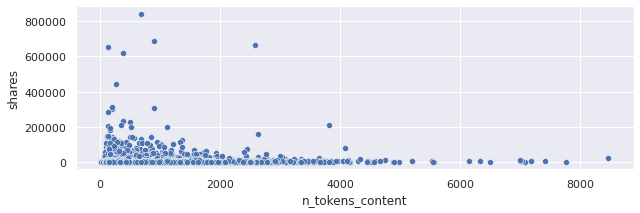

In [110]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,3))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=ONP)

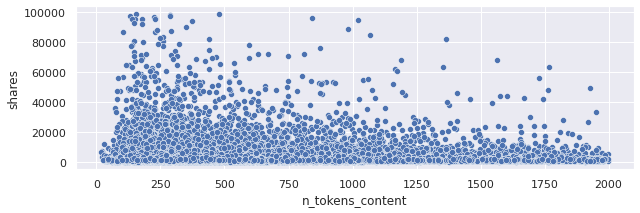

In [111]:
# Filtering to see if we see any correlation 

plt.figure(figsize=(10,3))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=ONP[(ONP['shares']<100000) & (ONP['n_tokens_content']<2000)])


In [112]:
a,b = ONP['shares'].mean(),ONP['shares'].median()
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

# Days of the week 
WeekDay = ONP.columns.values[26:33]
WeekDay

Mean article shares = 3355.3603983048642
Median article share = 1400.0


array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

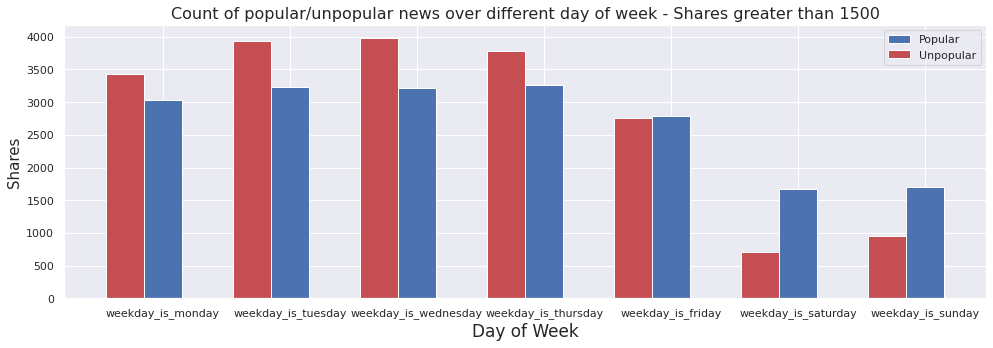

In [113]:
a=1500
Unpopular=ONP[ONP['shares']<a]
Popular=ONP[ONP['shares']>=a]
Unpopular_day = Unpopular[WeekDay].sum().values
Popular_day = Popular[WeekDay].sum().values

fig = plt.figure(figsize = (14,5))
plt.title("Count of popular/unpopular news over different day of week - Shares greater than 1500", fontsize = 16)

plt.bar(np.arange(len(WeekDay)),Popular_day,width=0.3,align='center',color='b',label='Popular')
plt.bar(np.arange(len(WeekDay))-0.3,Unpopular_day,width=0.3,align='center',color='r',label='Unpopular')

plt.xticks(np.arange(len(WeekDay)),WeekDay)
plt.ylabel('Shares',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


In [114]:
channels=ONP.columns[9:15]
channels


Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

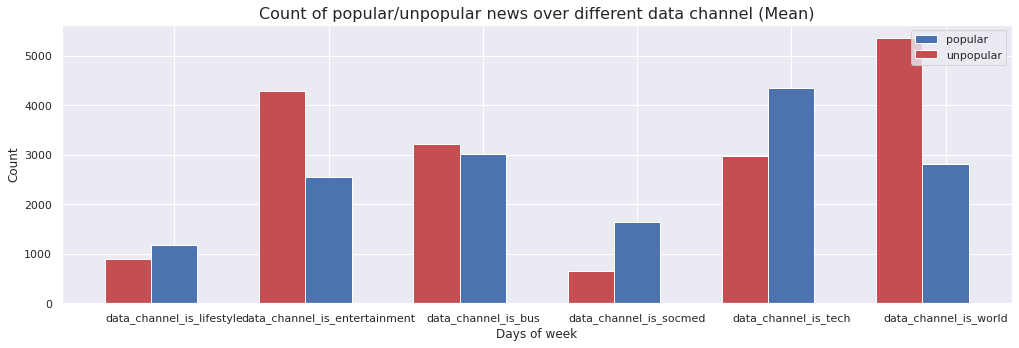

In [115]:
Unpopular_chan=ONP[ONP['shares']<a]
Popular_chan=ONP[ONP['shares']>=a]
Unpopular_channel = Unpopular_chan[channels].sum().values
Popular_channel = Popular_chan[channels].sum().values
fig = plt.figure(figsize = (14.4,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(channels)), Popular_channel, width = 0.3, align="center", color = 'b', \
          label = "popular")
plt.bar(np.arange(len(channels)) - 0.3, Unpopular_channel, width = 0.3, align = "center", color = 'r', \
          label = "unpopular")
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

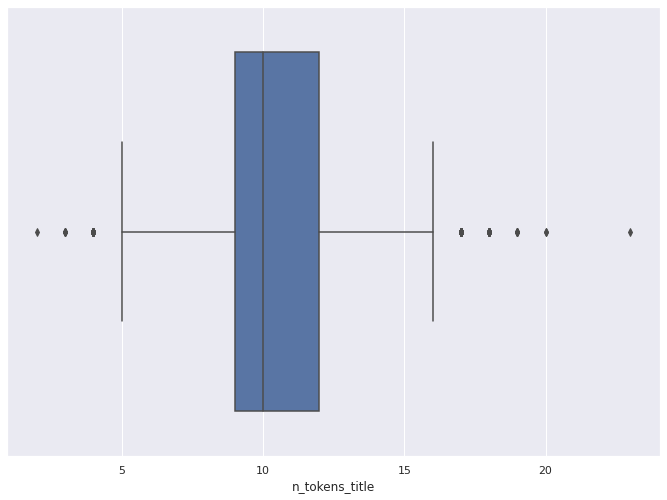

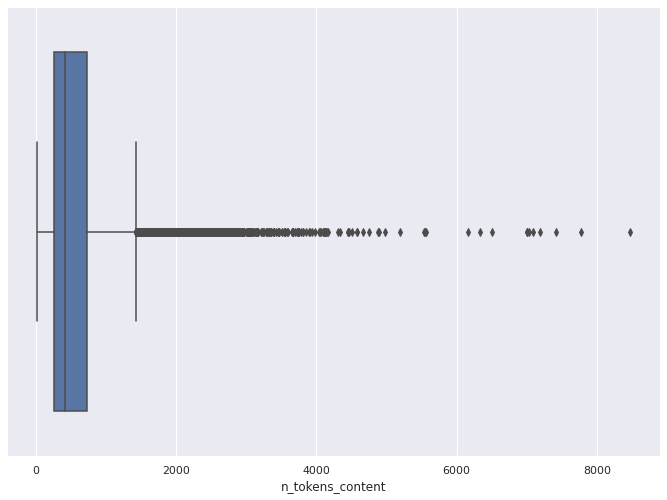

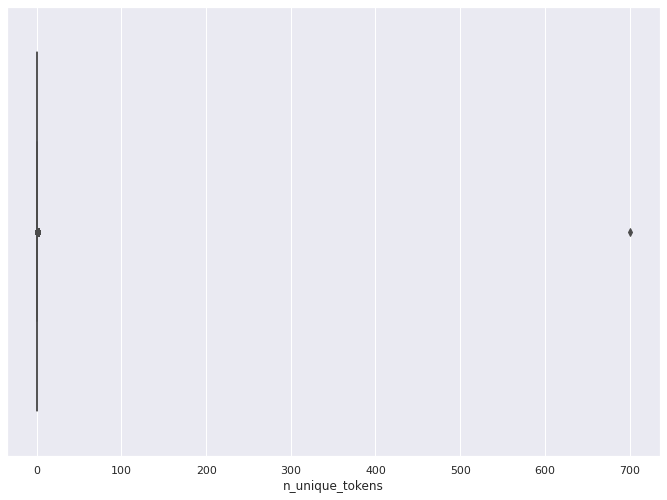

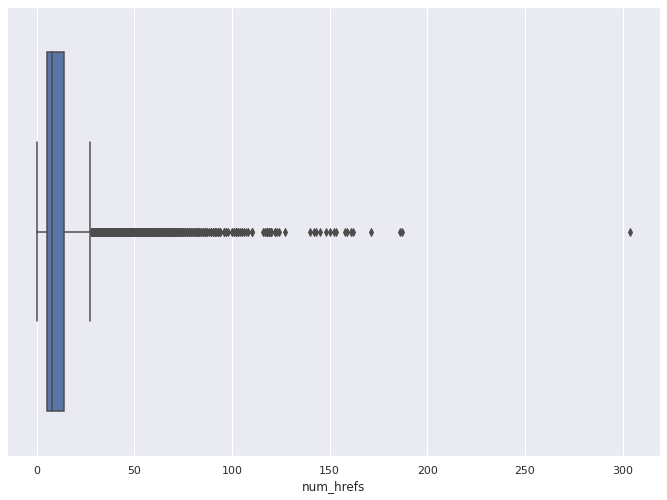

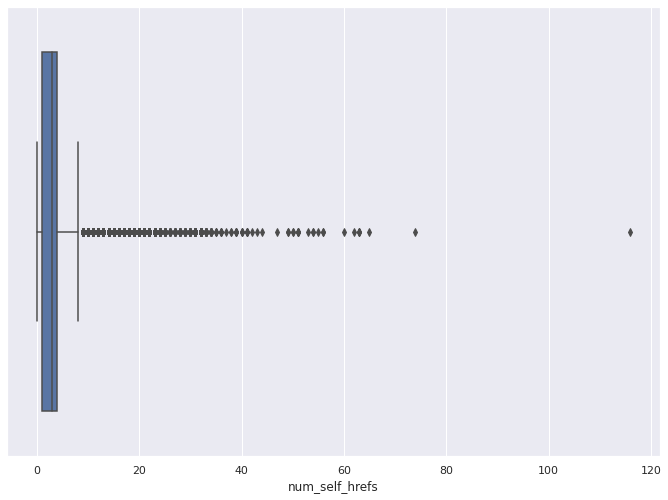

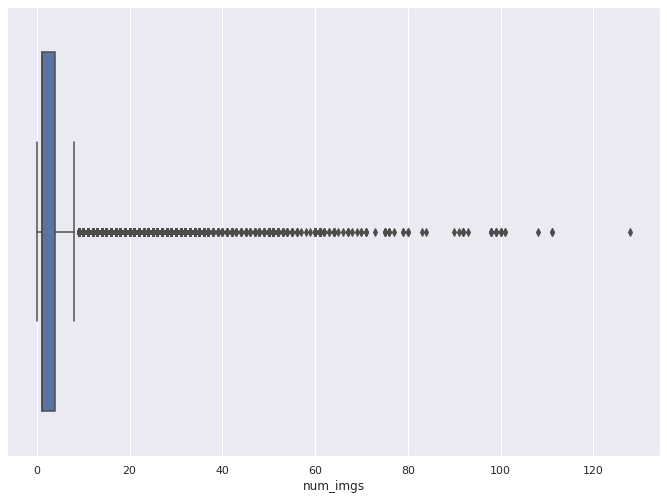

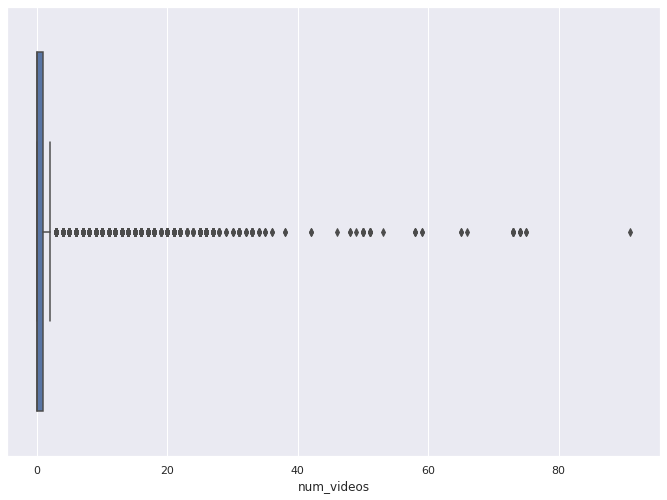

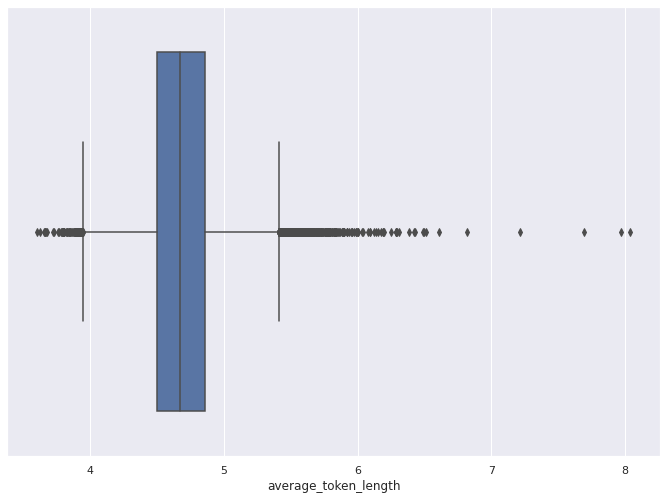

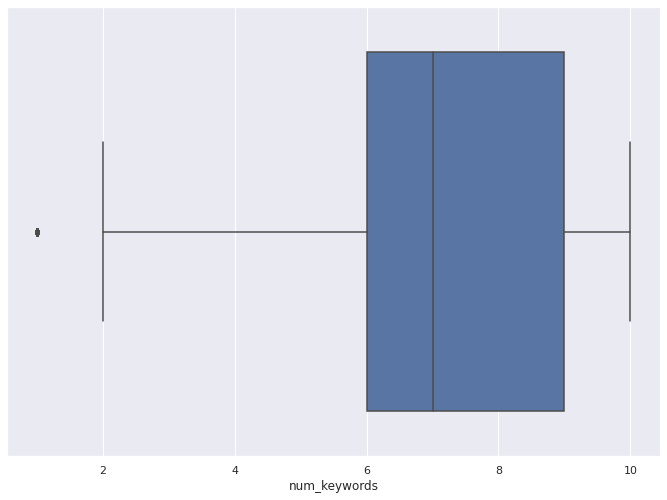

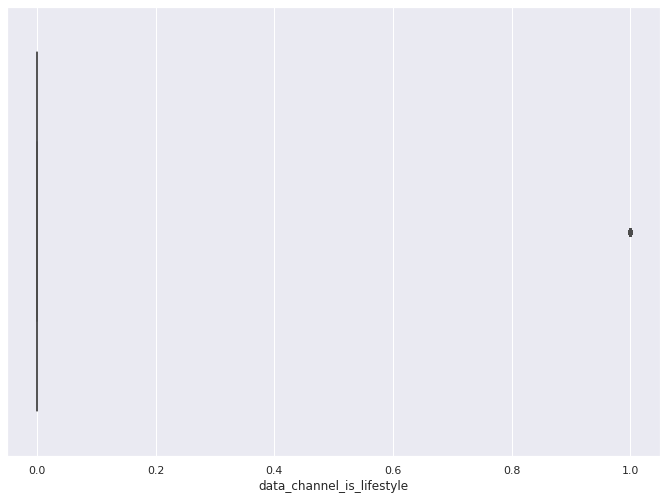

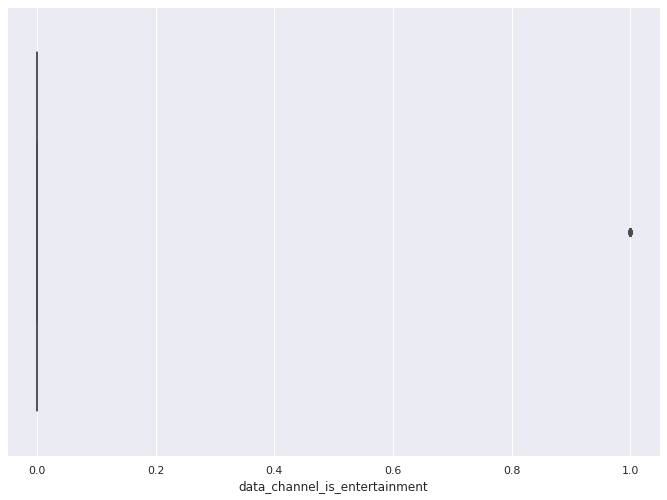

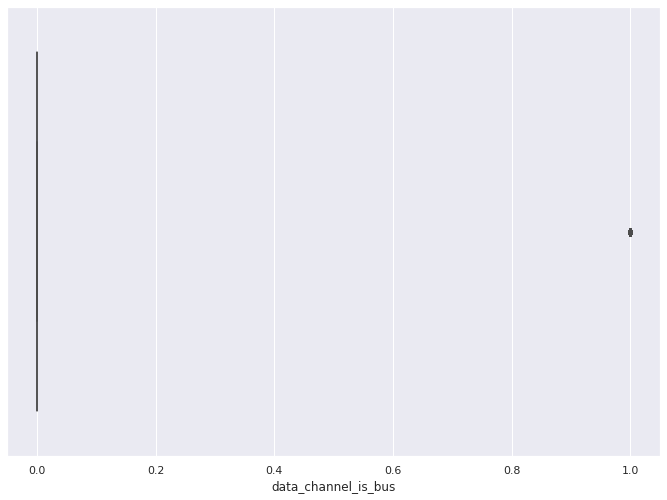

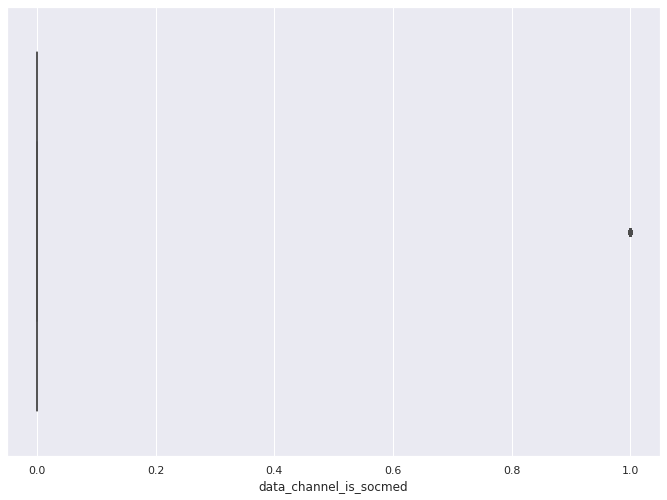

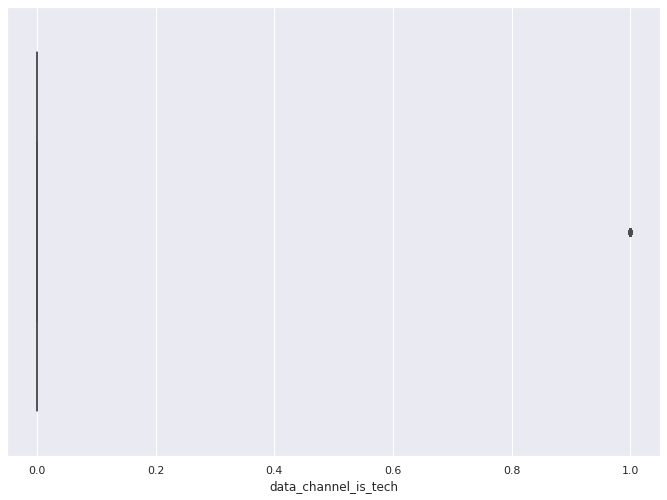

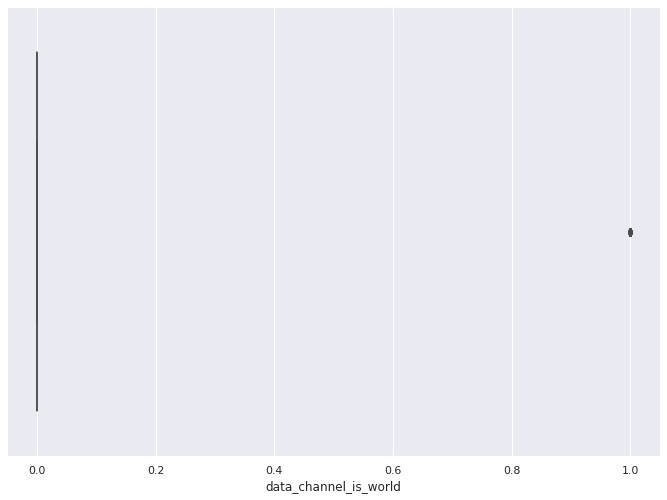

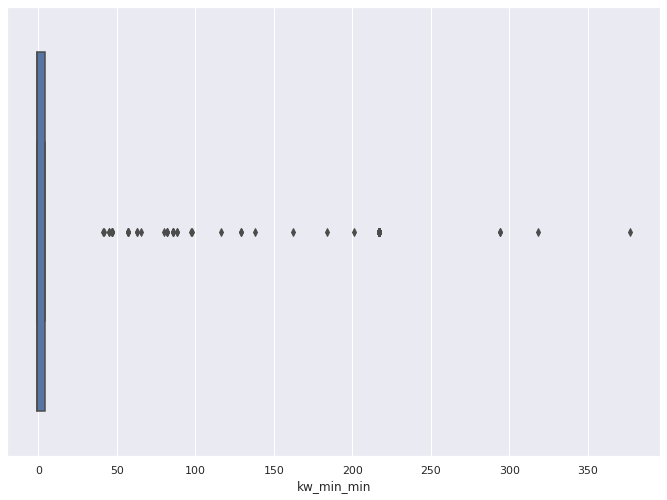

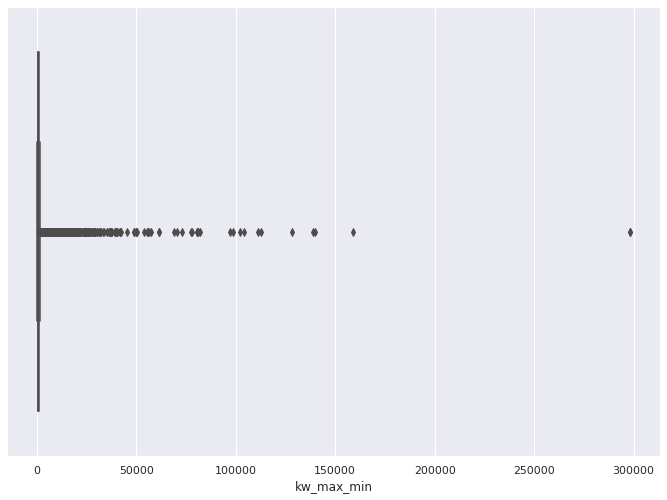

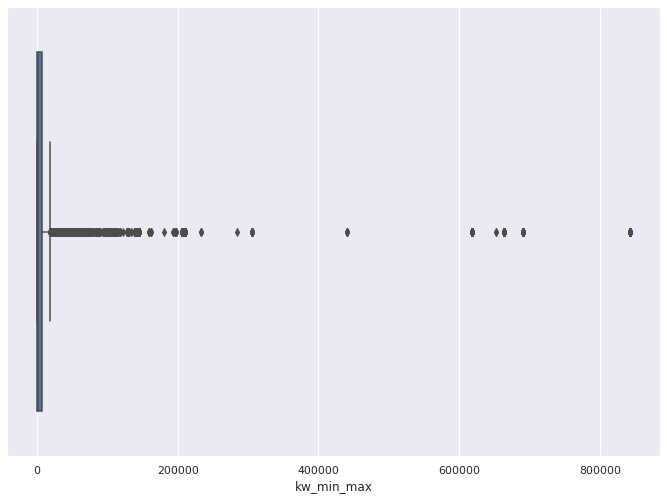

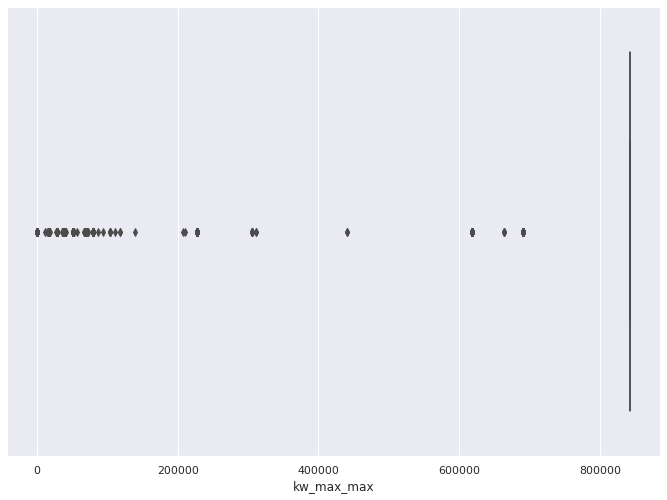

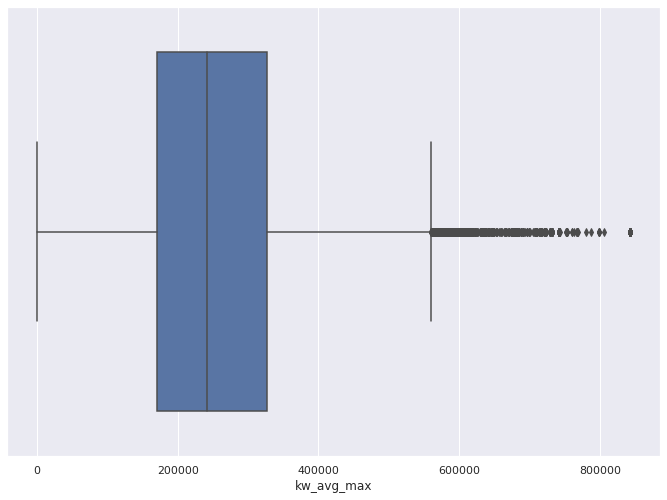

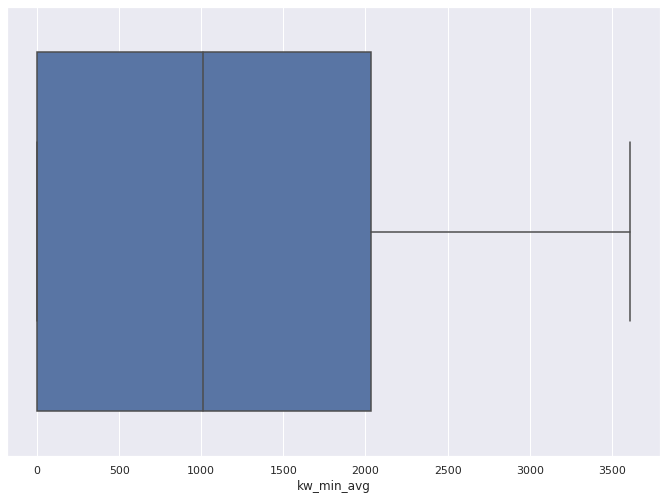

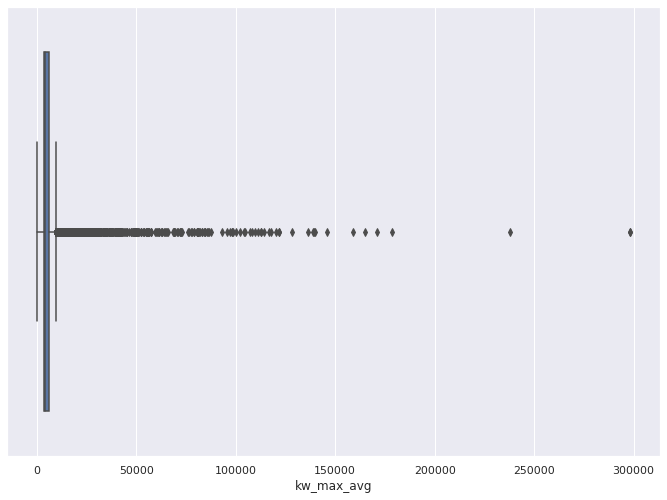

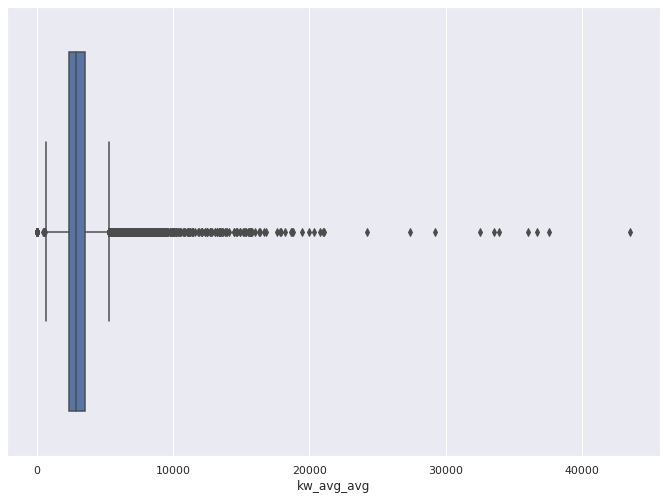

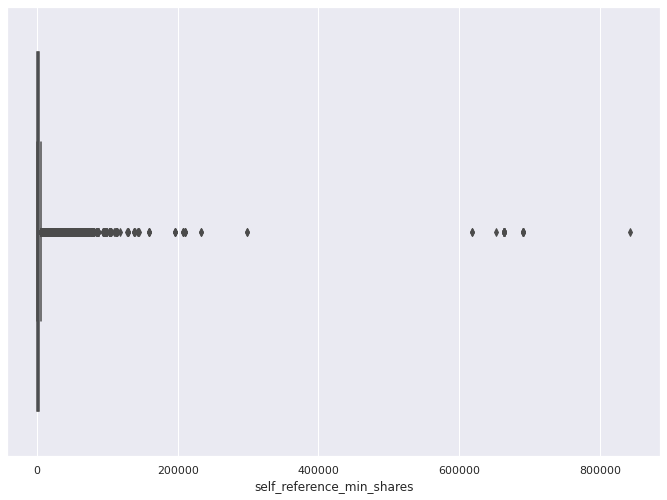

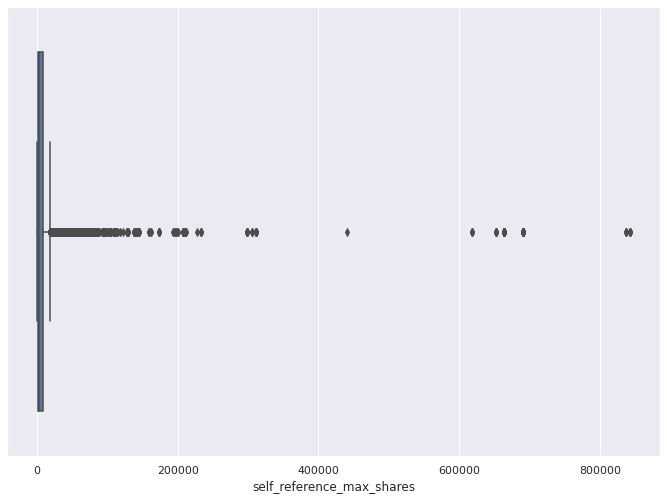

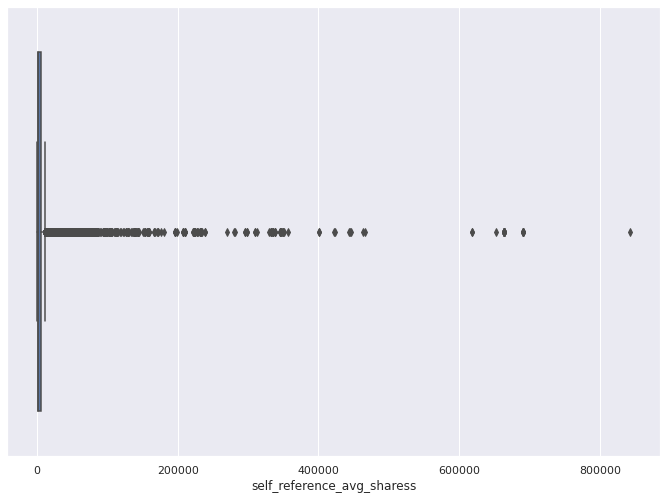

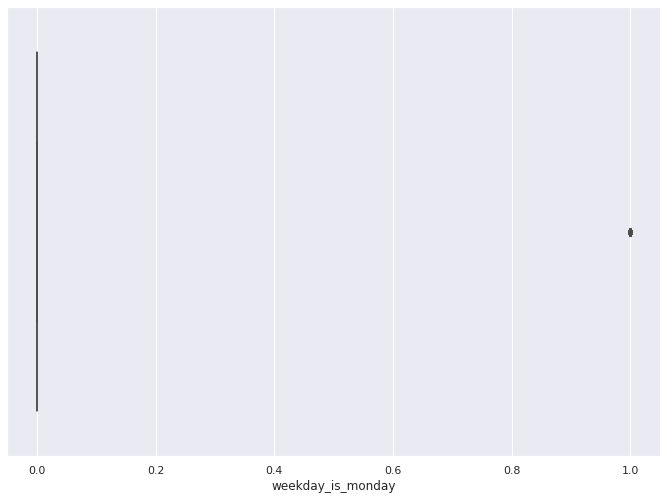

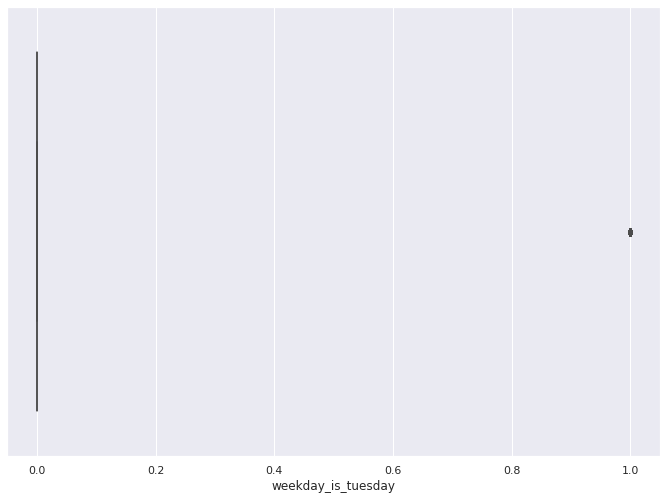

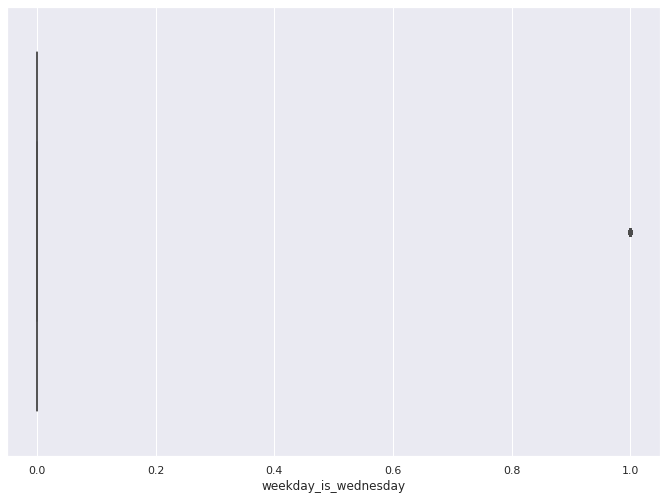

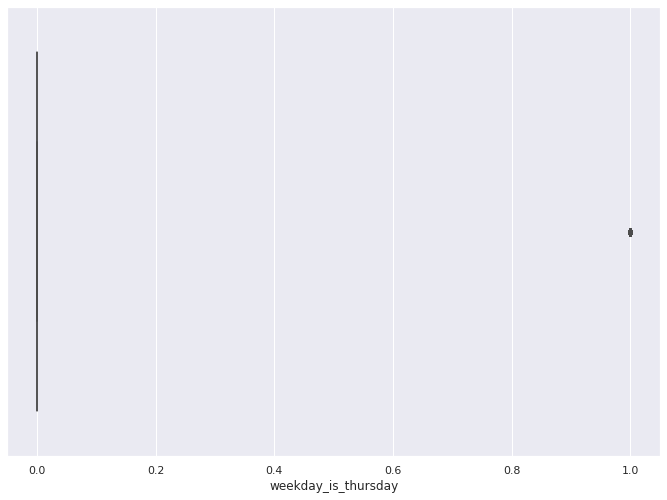

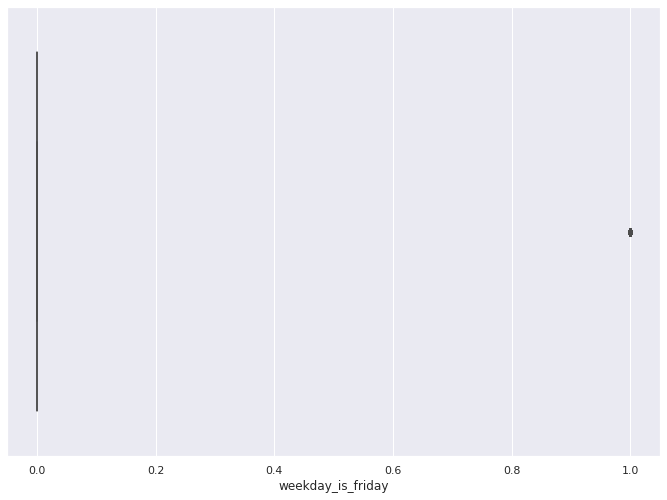

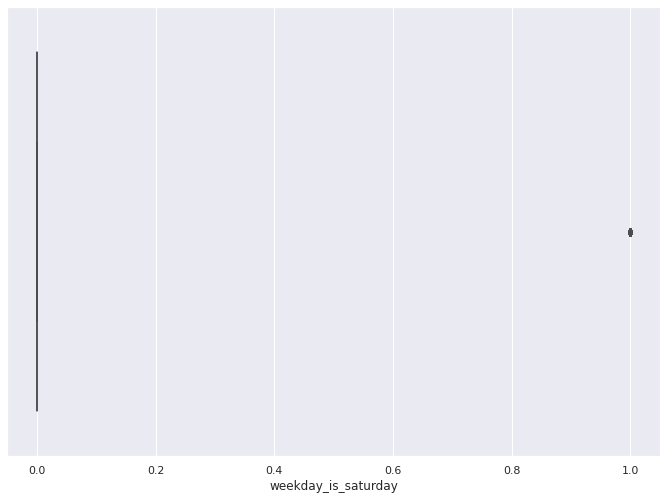

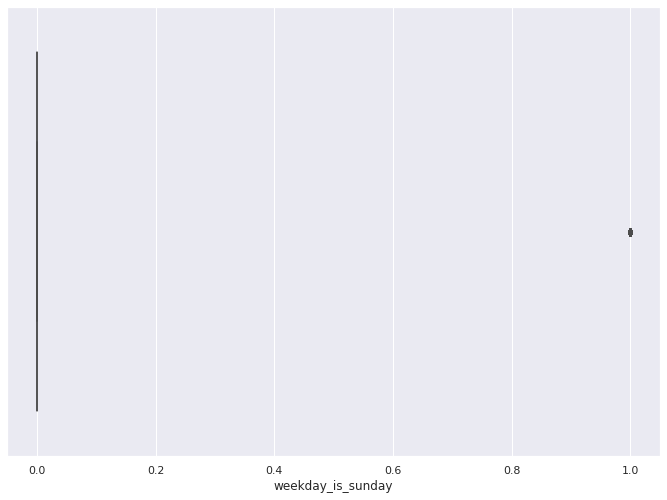

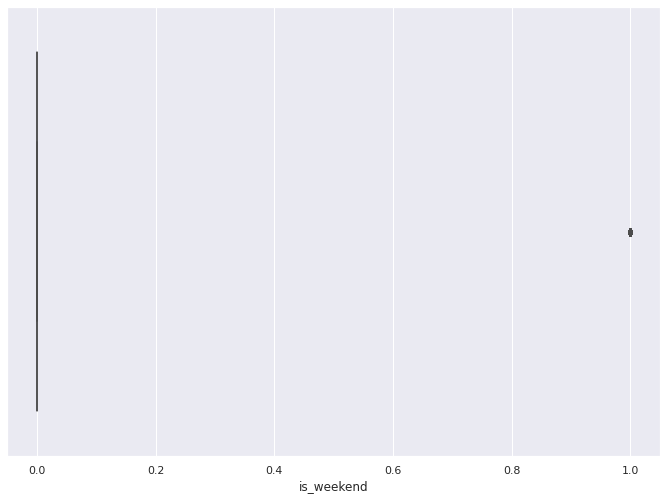

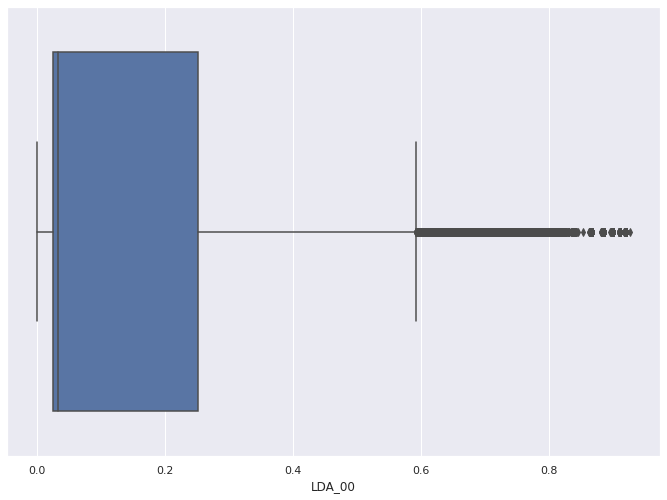

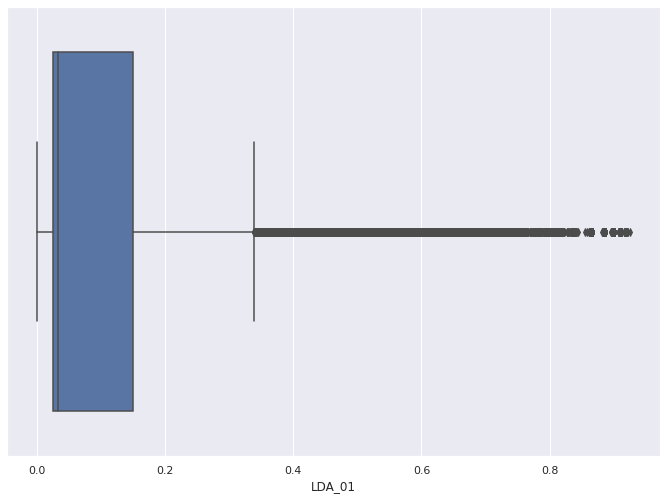

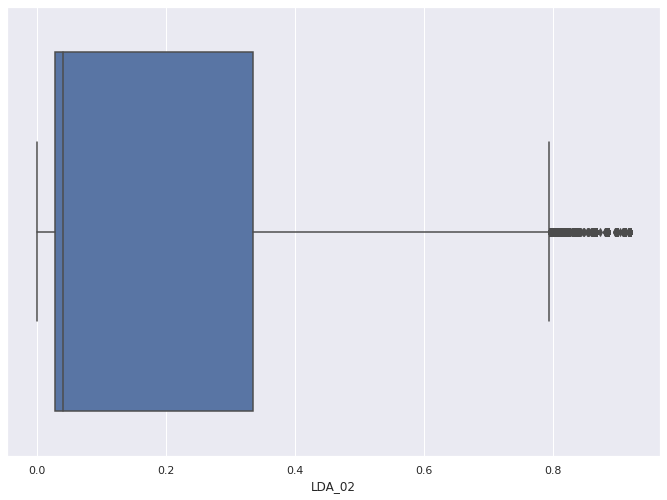

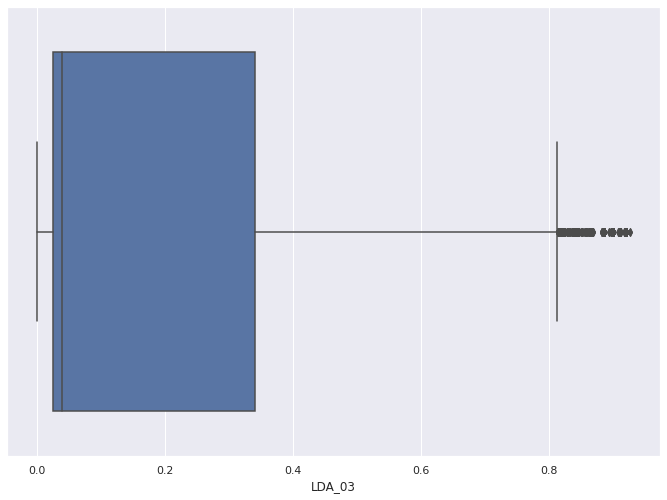

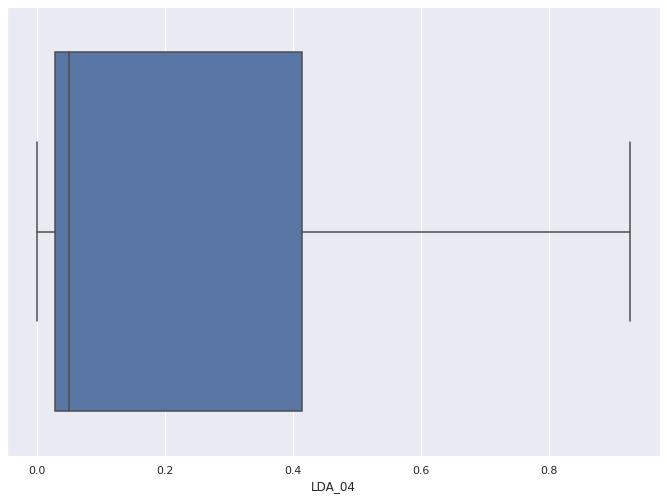

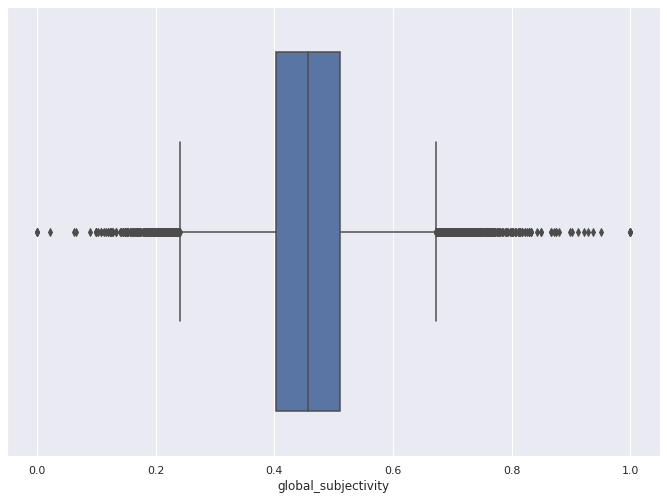

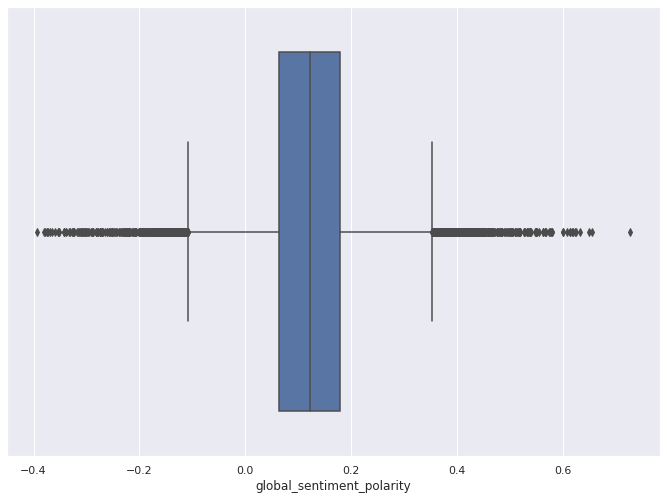

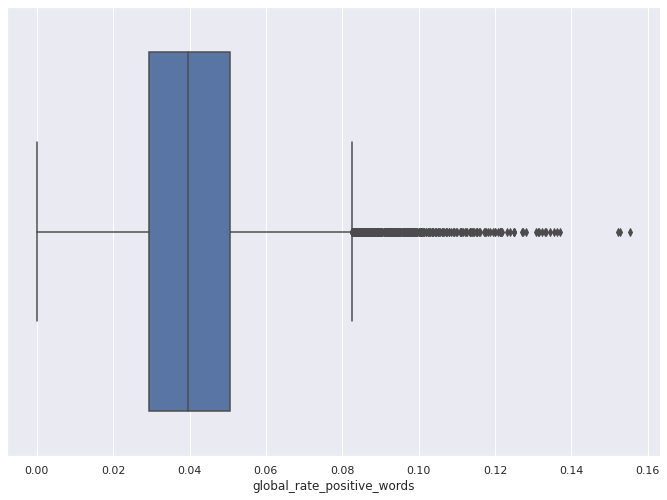

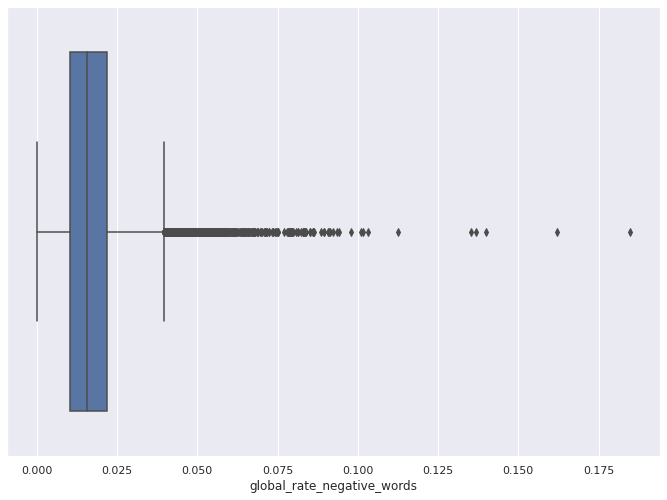

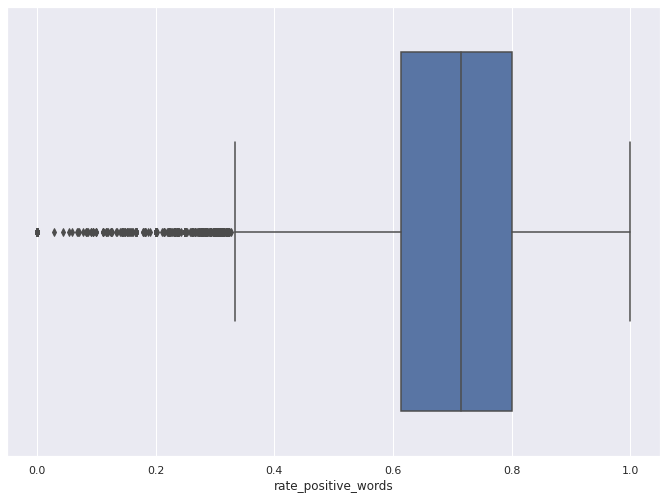

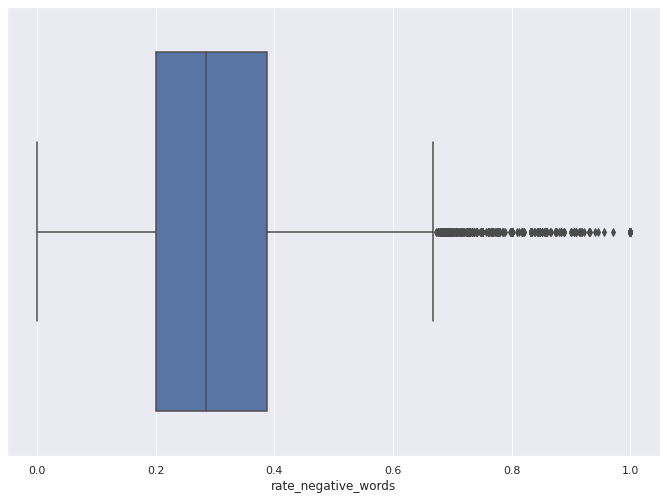

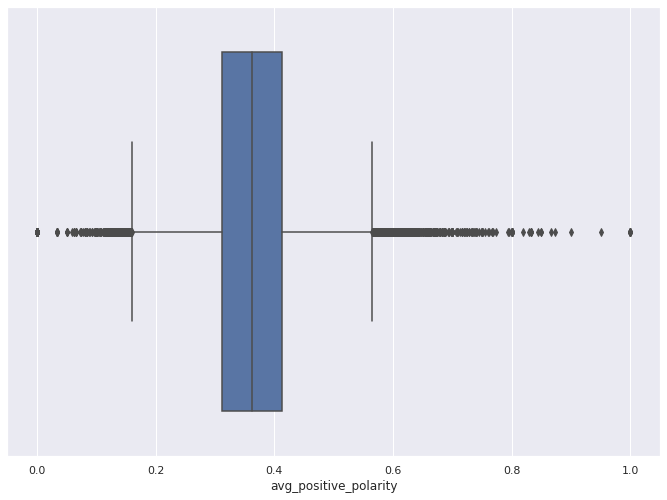

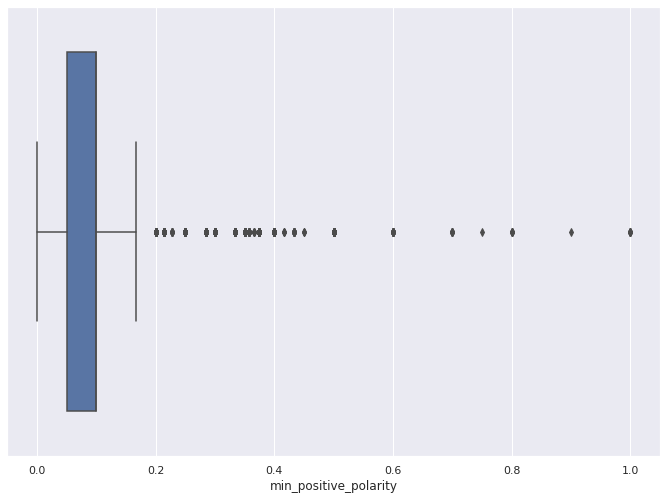

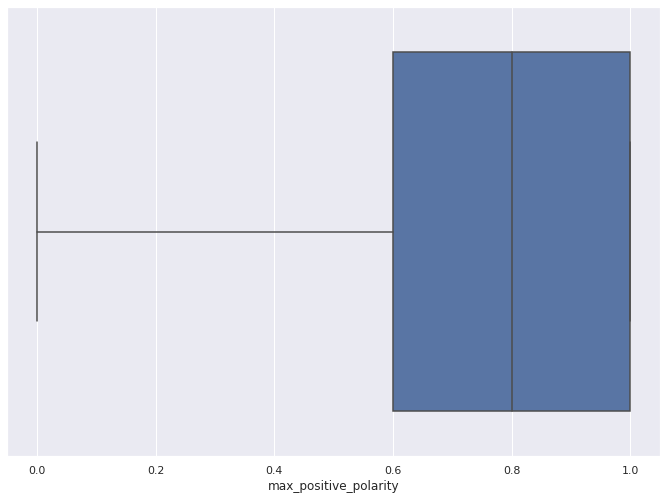

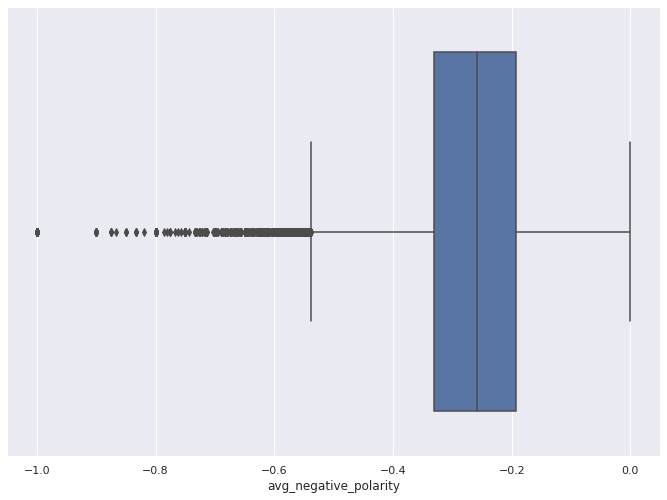

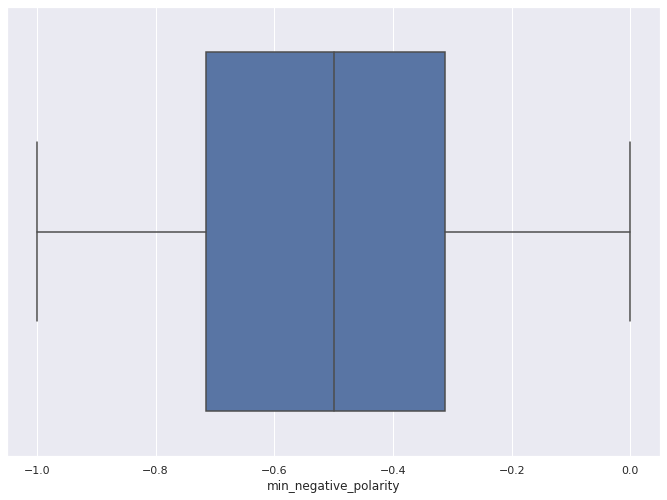

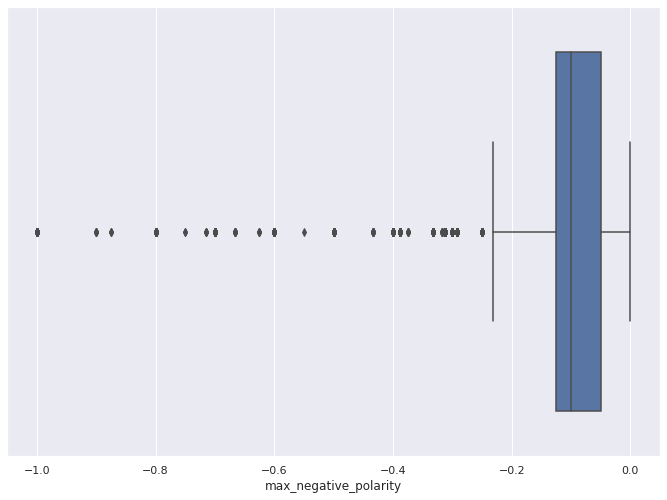

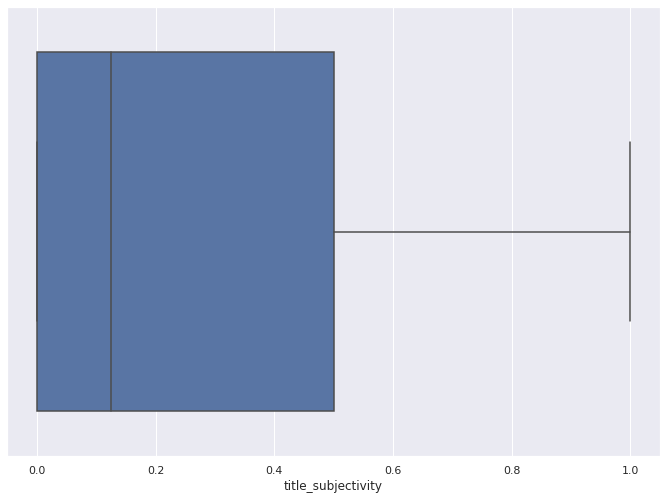

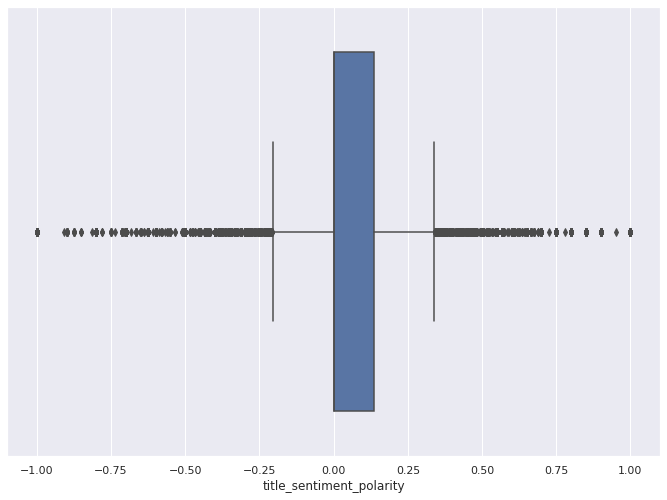

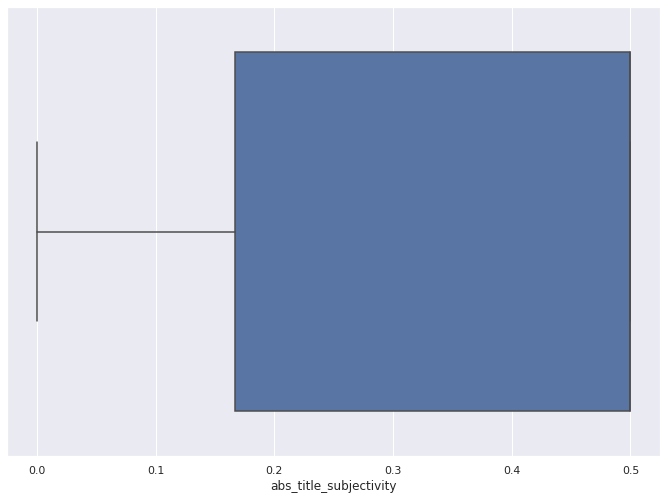

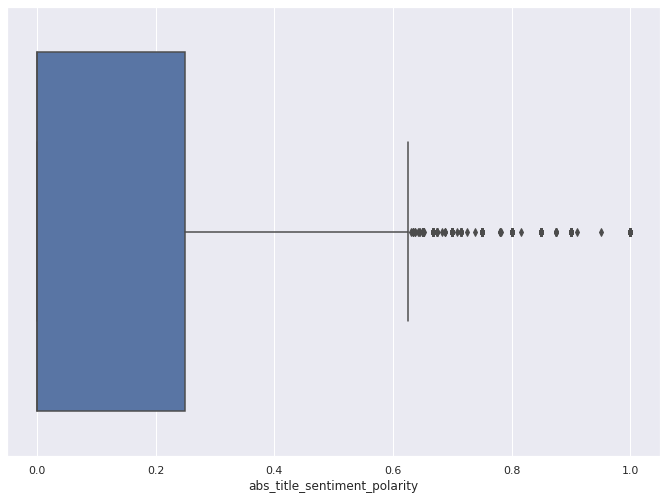

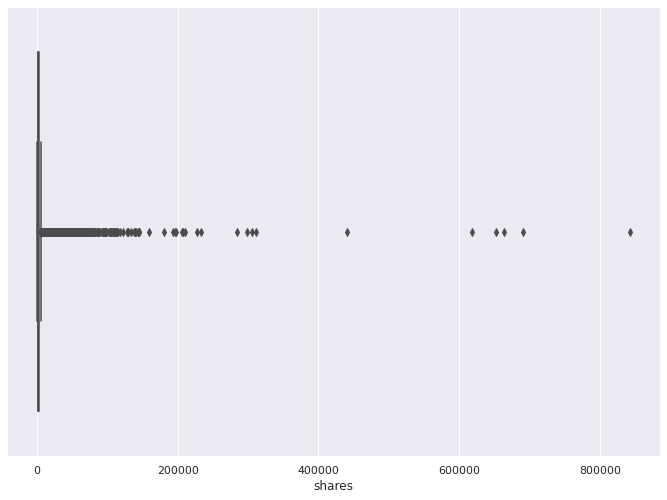

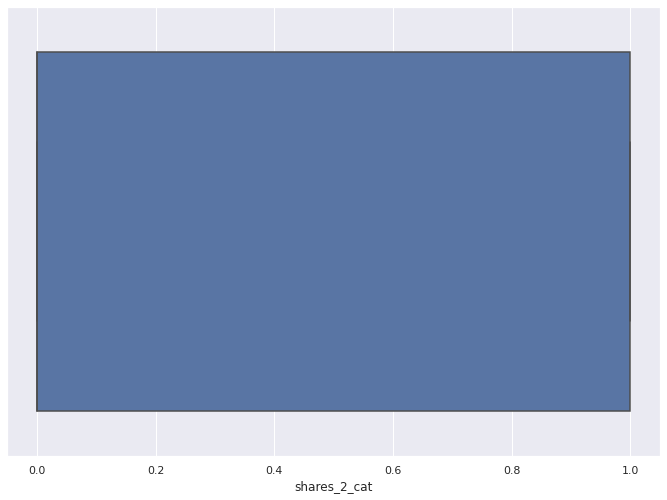

In [116]:
# Outlier Treatment
numerical_cols = ONP.select_dtypes(['int64','float64']).columns
for i in range(len(numerical_cols)):
    sns.boxplot(ONP[numerical_cols[i]])
    plt.show()

In [117]:
# Checking the upper and lower limit

for column in numerical_cols:    
    q1 = ONP[column].quantile(0.25)    # First Quartile
    q3 = ONP[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = ONP[(ONP[column] < llimit) | (ONP[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

we can remove this ouliers after applying transformation

In [118]:
## Scaling of Dataset

# ONP2_num  dataframe contains numerical feaures.

ONP2_numerical=ONP.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# ONP2_cat dataframe contains catagoricl features.

ONP2_categorical=ONP[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [119]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from ONP2_num

ONP2_numerical = ONP2_numerical.drop('shares',axis=1)

In [120]:
ONP2_numerical.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares_2_cat', 'shares_4_cat'],
      dtype='object')

In [121]:
cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares_2_cat', 'shares_4_cat']
ONP2_numerical[cols] = ONP2_numerical[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [122]:
# Finding negative values.

negativecols=ONP2_numerical.columns[(ONP2_numerical<=0).any()]
negativecols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares_2_cat'],
      dtype='object')

We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [123]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negativecols:
    m=ONP2_numerical[i].min()
    name=i +'_new'
    ONP2_numerical[name]=((ONP2_numerical[i]+1)-m)

In [124]:
ONP2_numerical.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares_2_cat', 'shares_4_cat',
       'num_hrefs_new', 'num_self_hrefs_new', 'num

In [125]:
# Droping old negative column

for i in negativecols:
    ONP2_numerical.drop(i,axis=1,inplace=True)

In [126]:
# Checking negative columns
# 
negativecols=ONP2_numerical.columns[(ONP2_numerical<=0).any()]
negativecols

Index([], dtype='object')

No Negative values

In [127]:
# Copy 
ONP2_numerical_add = ONP2_numerical.copy()

In [128]:
#Treating outlier :  

for col in ONP2_numerical_add.columns:
    percentiles = ONP2_numerical_add[col].quantile([0.01,0.99]).values
    ONP2_numerical_add[col][ONP2_numerical_add[col] <= percentiles[0]] = percentiles[0]
    ONP2_numerical_add[col][ONP2_numerical_add[col] >= percentiles[1]] = percentiles[1]

In [129]:
# Checking outliers again

numerical_cols = ONP2_numerical_add.select_dtypes(['int64','float64']).columns

for column in numerical_cols:    
    q1 = ONP2_numerical_add[column].quantile(0.25)    # First Quartile
    q3 = ONP2_numerical_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = ONP2_numerical_add[(ONP2_numerical_add[column] < llimit) | (ONP2_numerical_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 0
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "average_token_length" : 466
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 0
1.5
13.5
3.0
Number of outliers in "shares_4_cat" : 0
nan
nan
nan
Number of outliers in "num_hrefs_new" : 2636
-7.5
28.5
9.0
Number of outliers in "num_self_hrefs_new" : 2090
-2.5
9.5
3.0
Number of outliers in "num_imgs_new" : 7466
-2.5
9.5
3.0
Number of outliers in "num_videos_new" : 2939
-0.5
3.5
1.0
Number of outliers in "kw_min_min_new" : 4638
-6.5
13.5
5.0
Number of outliers in "kw_max_min_new" : 3566
-386.5
1833.5
555.0
Number of outliers in "kw_min_max_new" : 4827
-11549.0
19251.0
7700.0
Number of outliers in "kw_max_max_new" : 9365
843301.0
843301.0
0.0
Number of outliers in "kw_avg_max_new" : 879
-62068.1964282

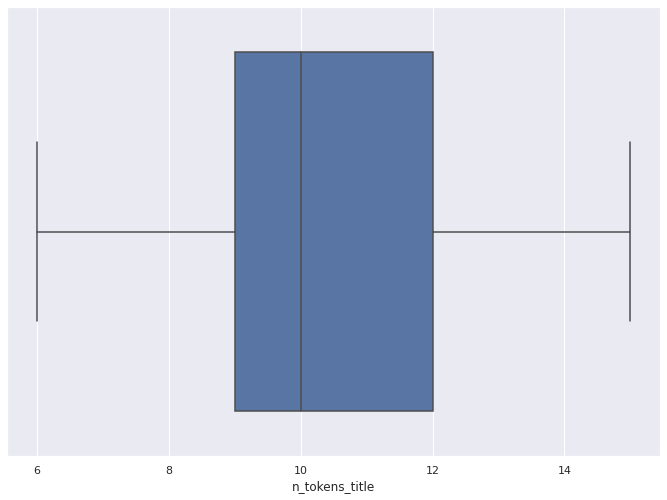

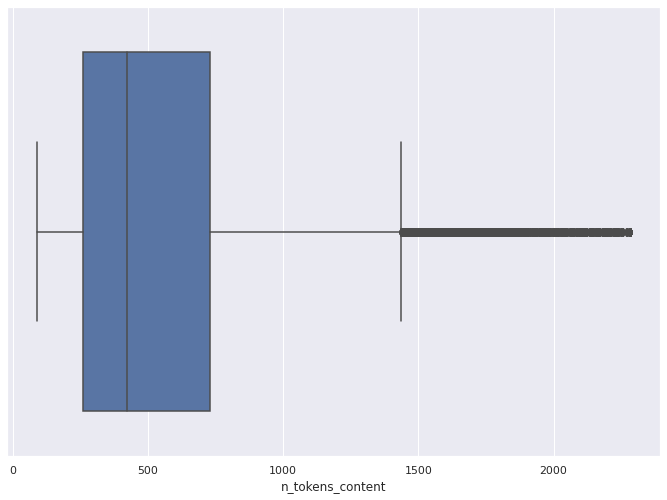

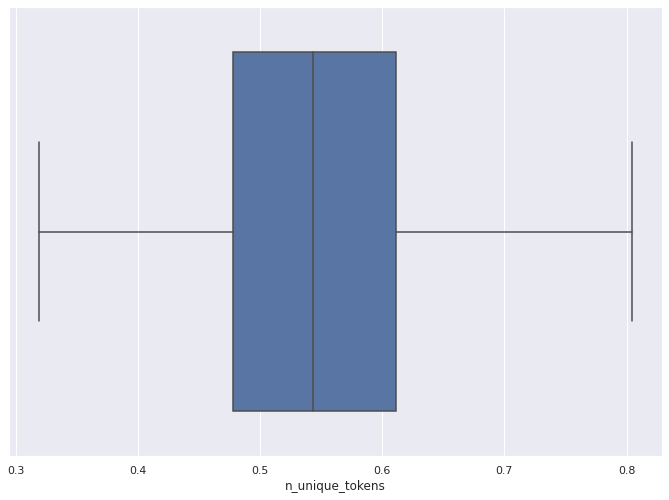

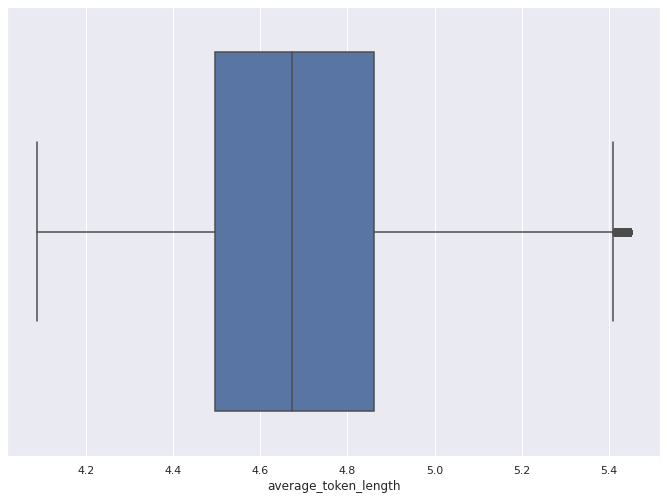

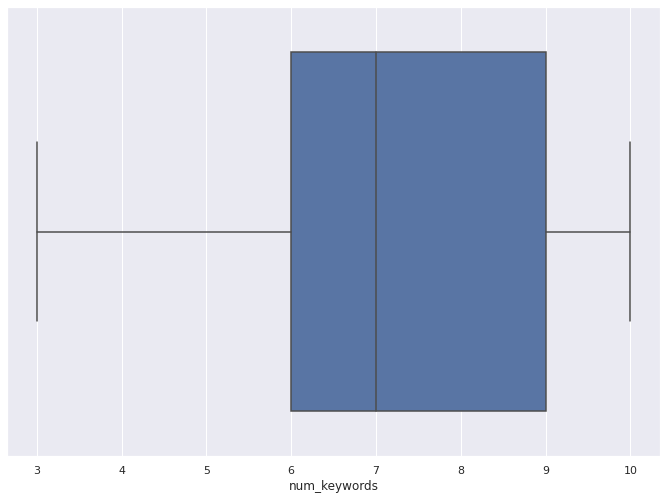

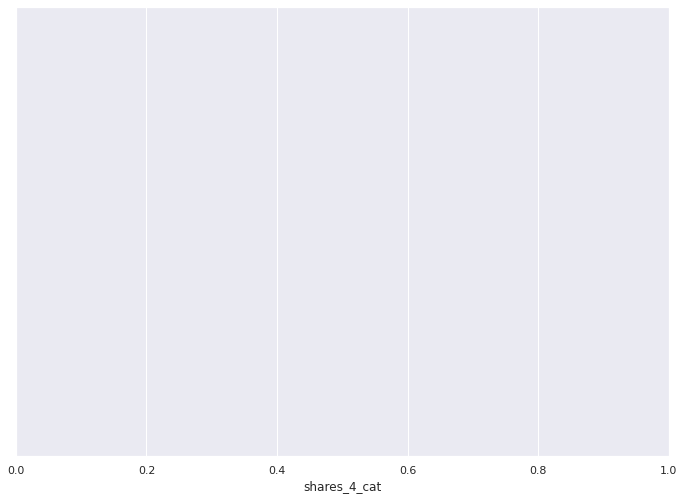

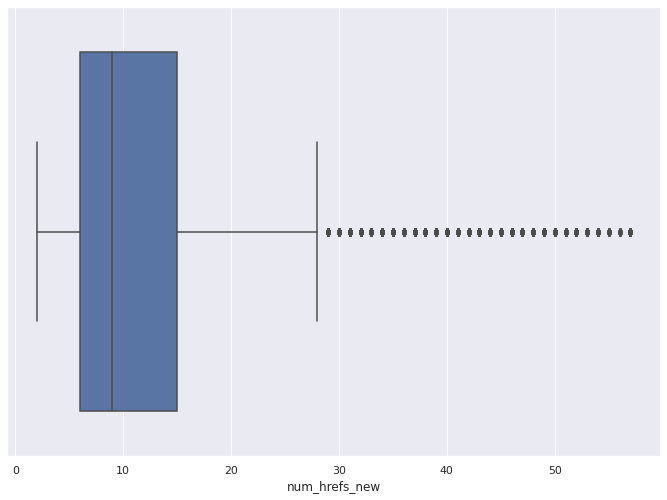

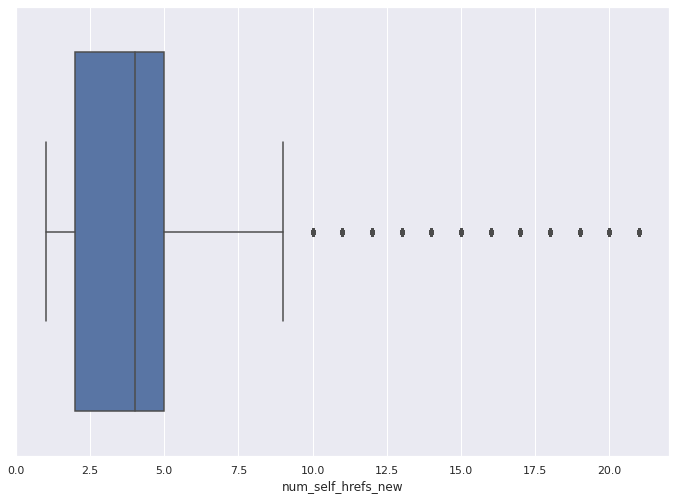

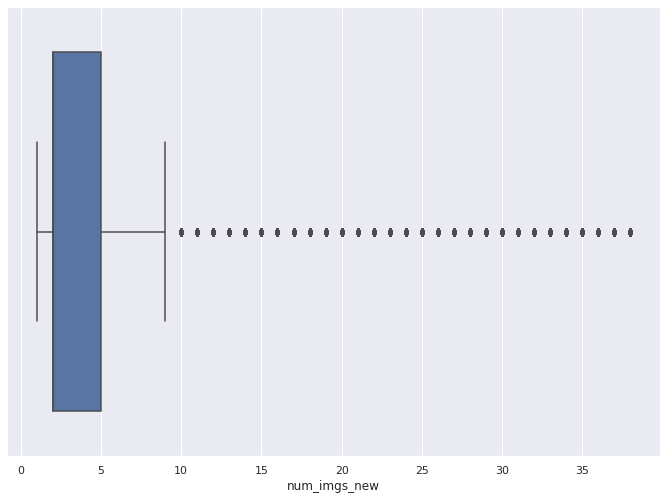

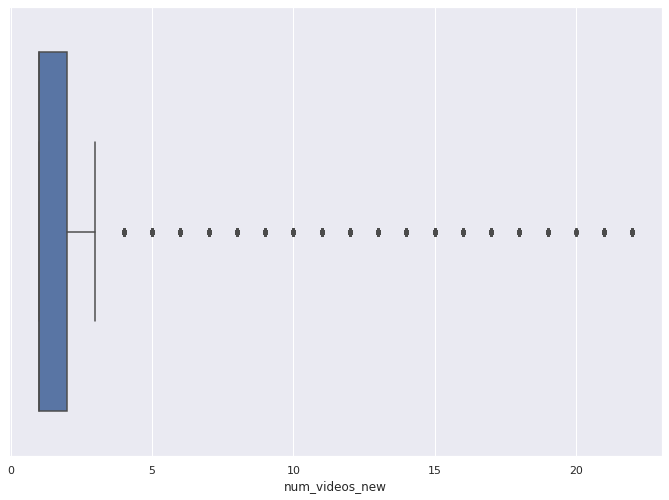

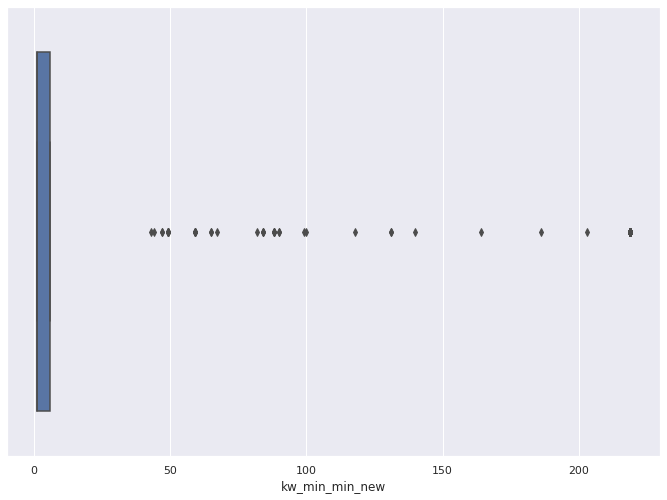

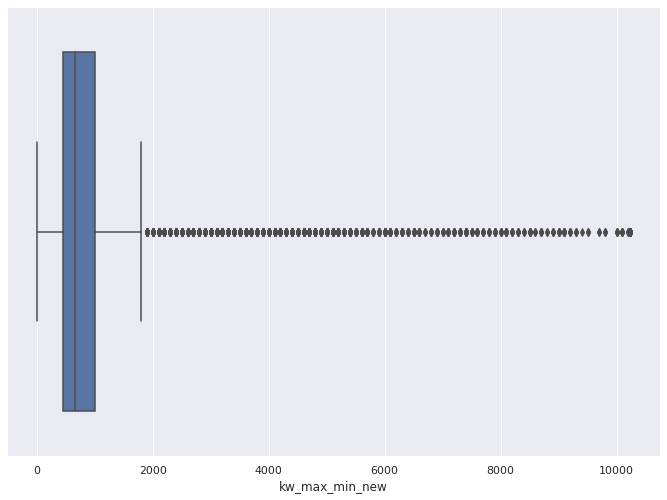

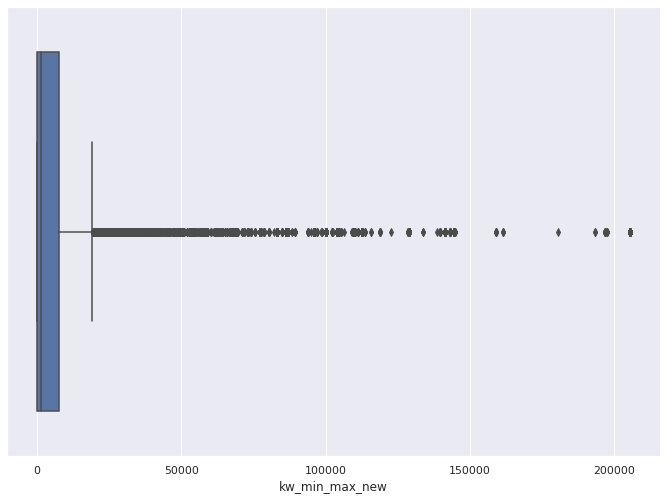

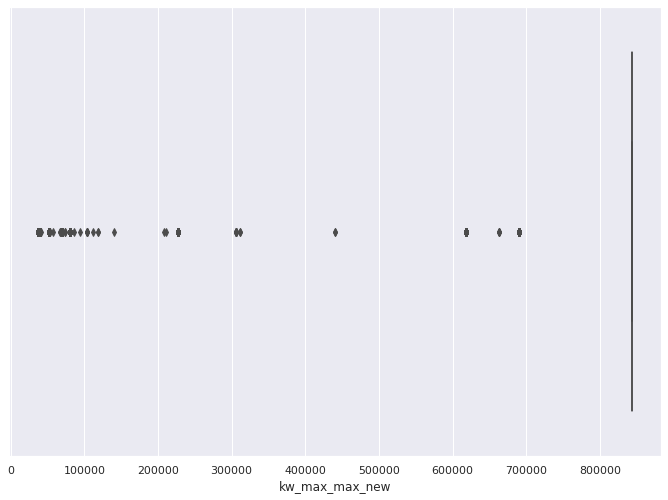

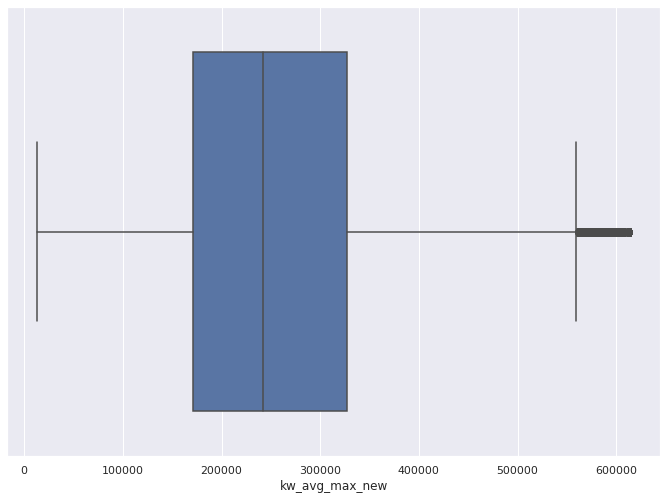

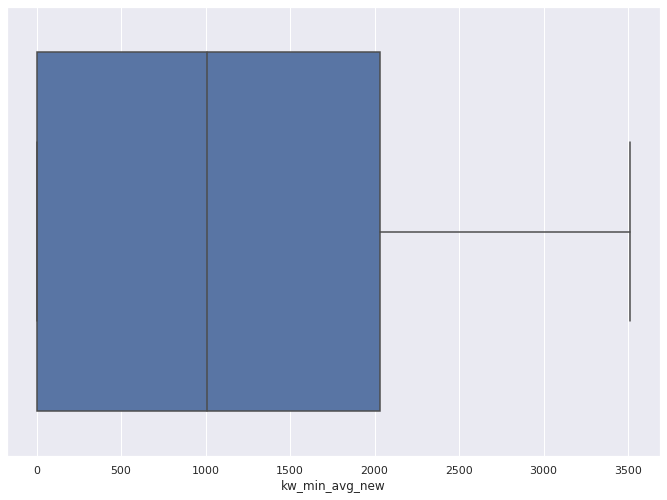

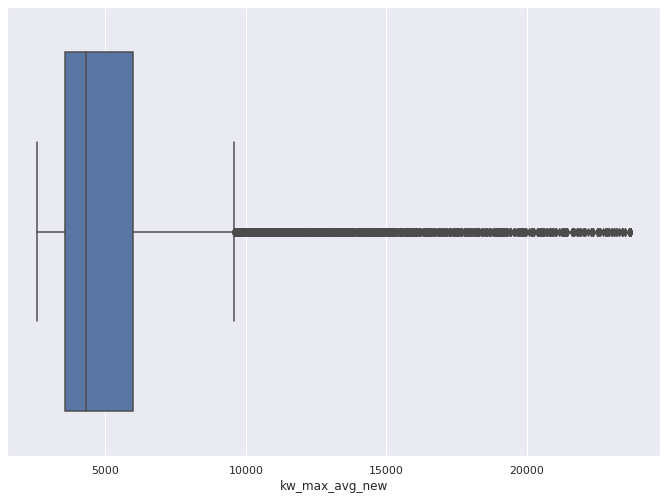

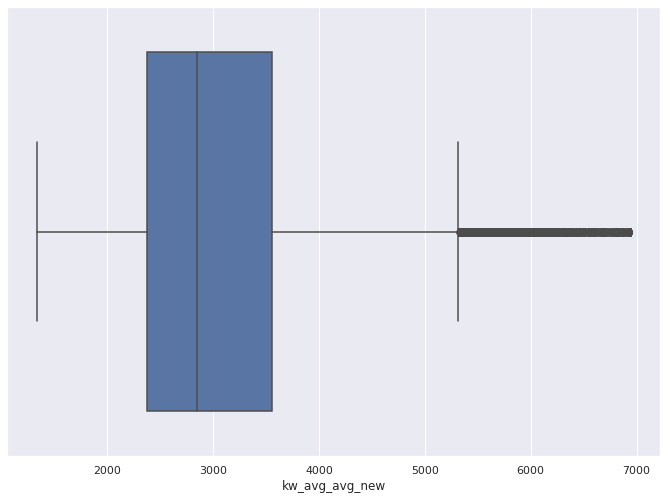

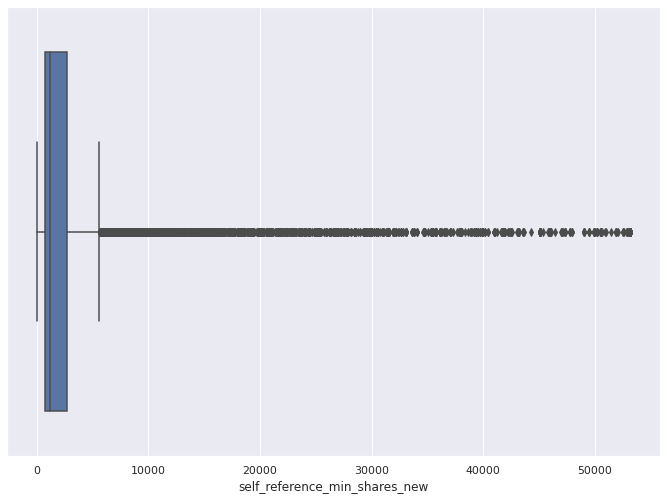

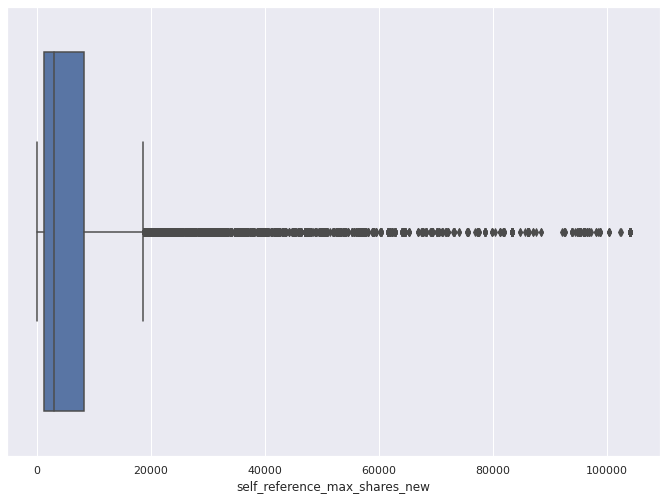

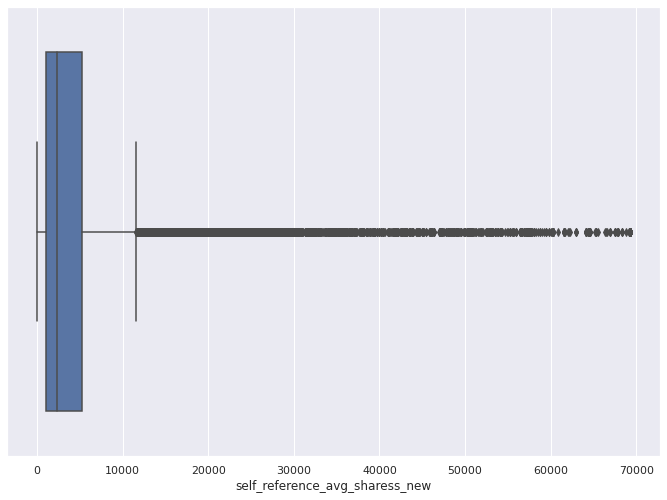

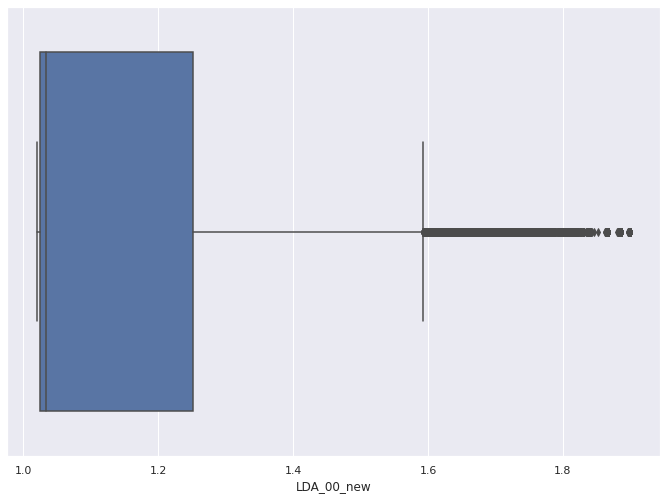

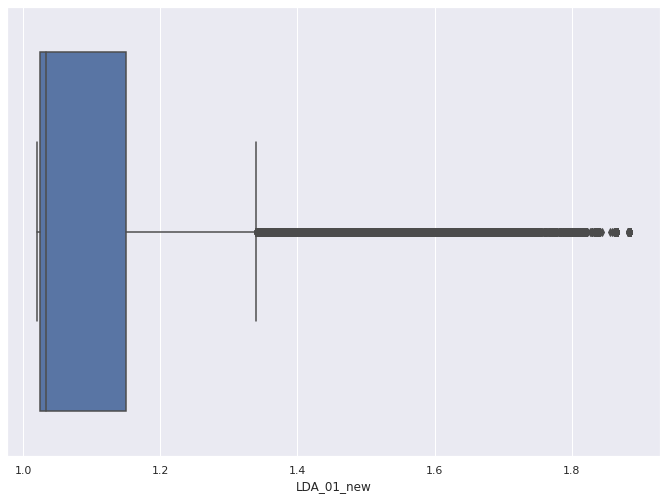

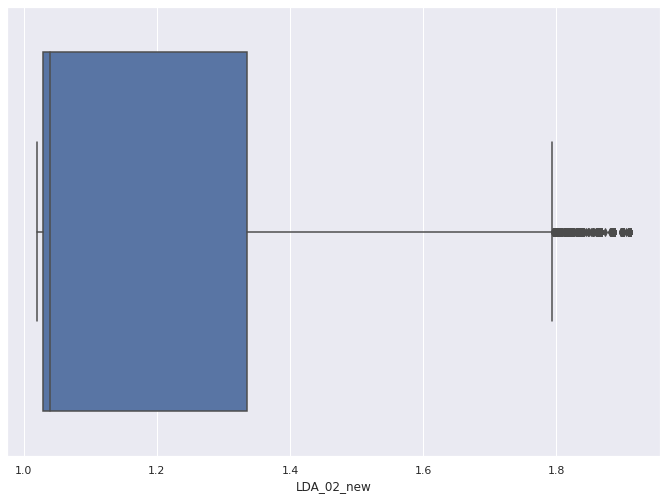

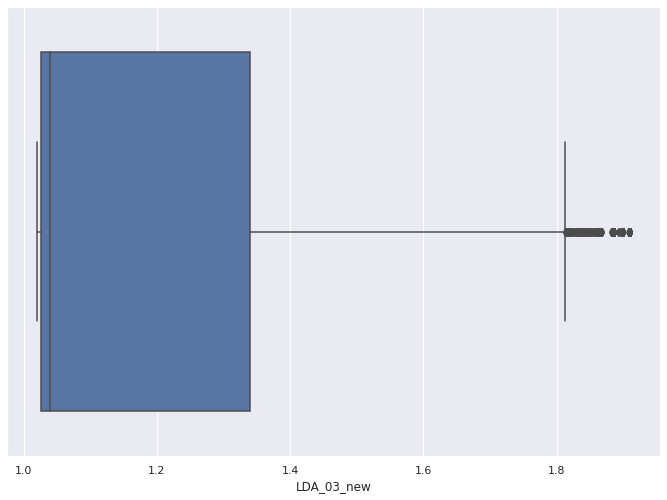

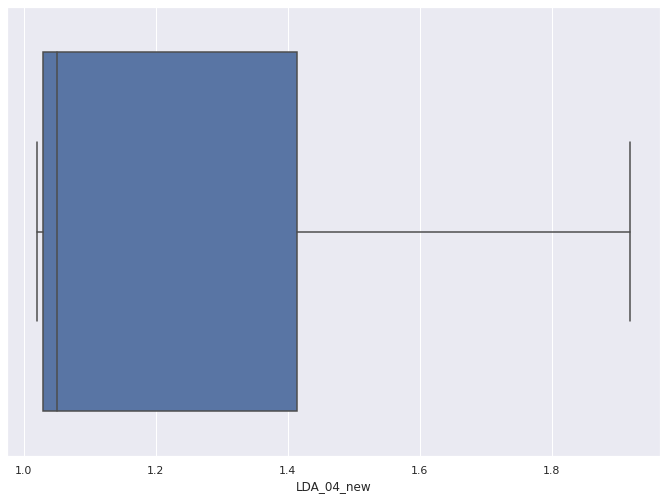

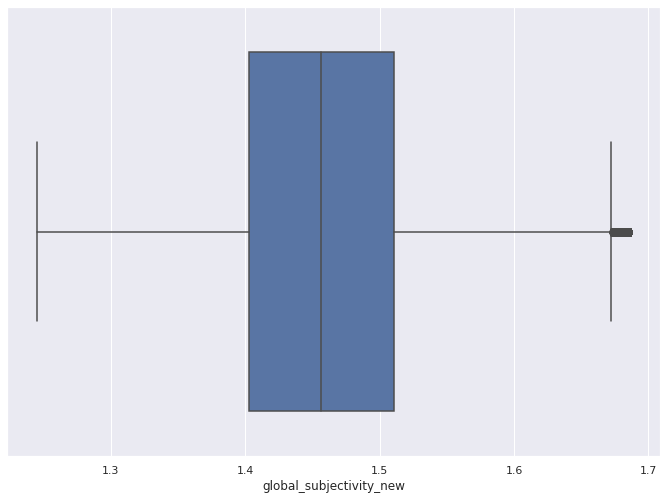

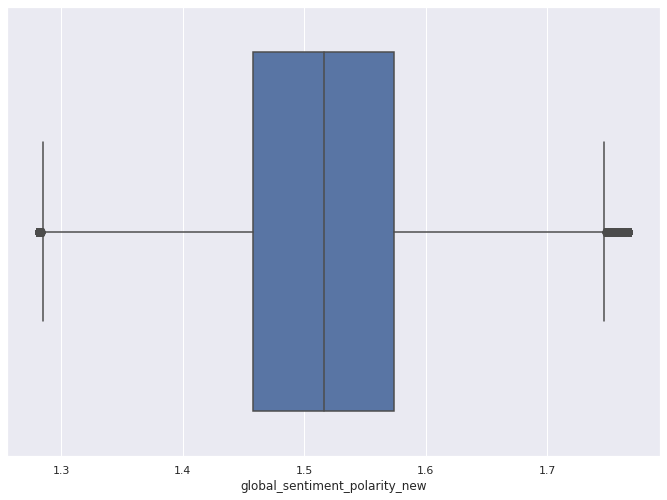

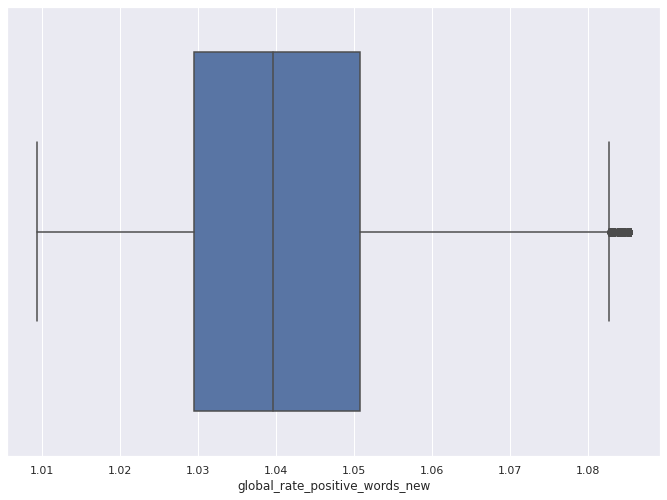

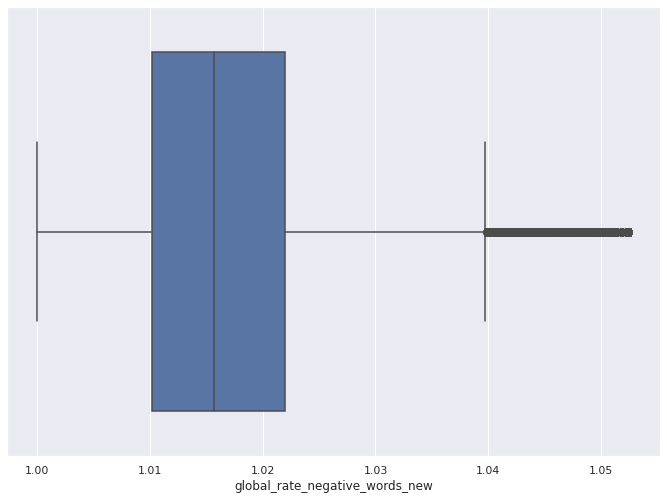

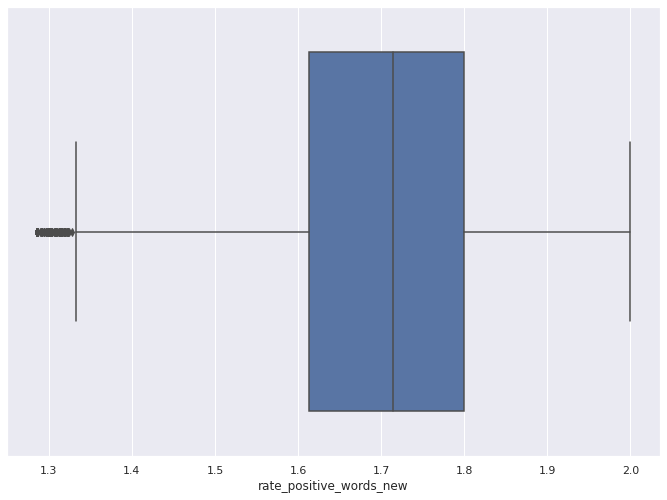

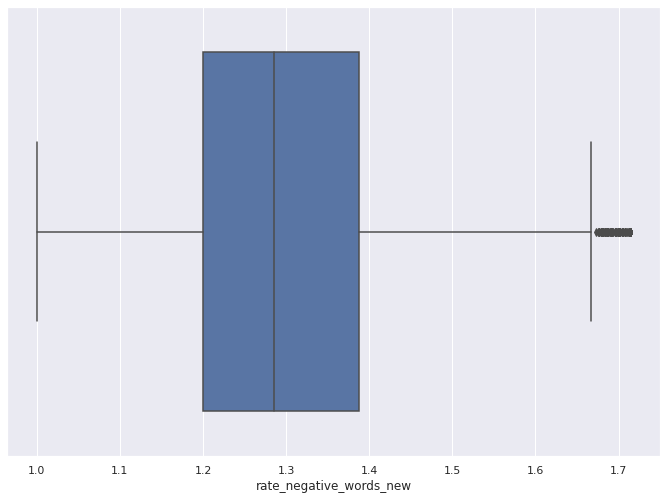

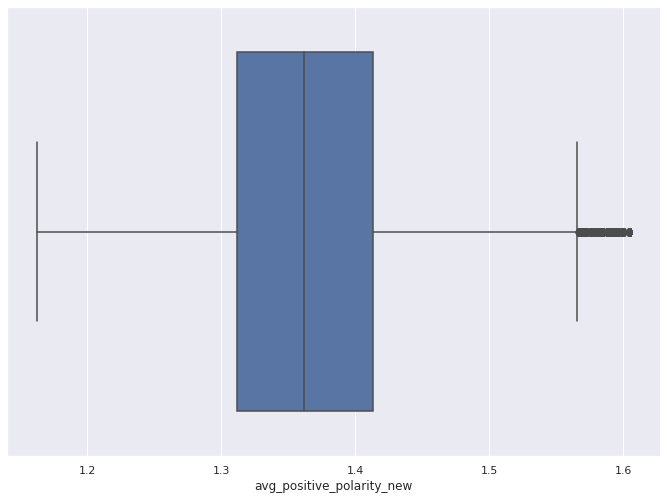

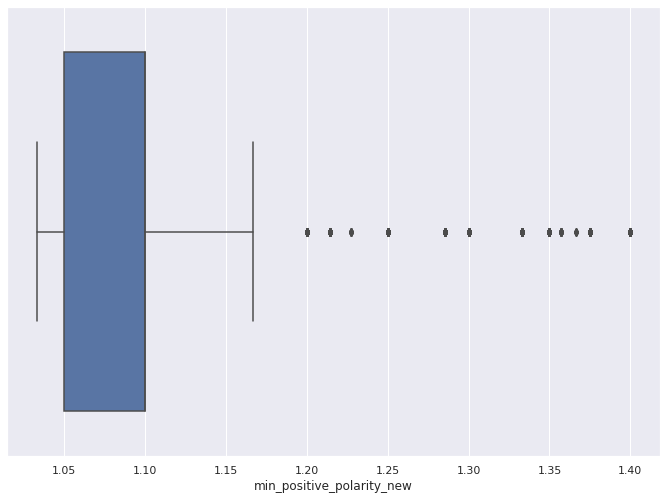

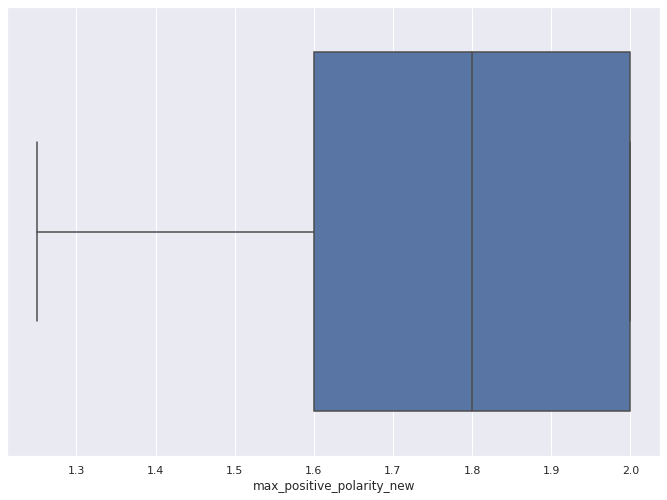

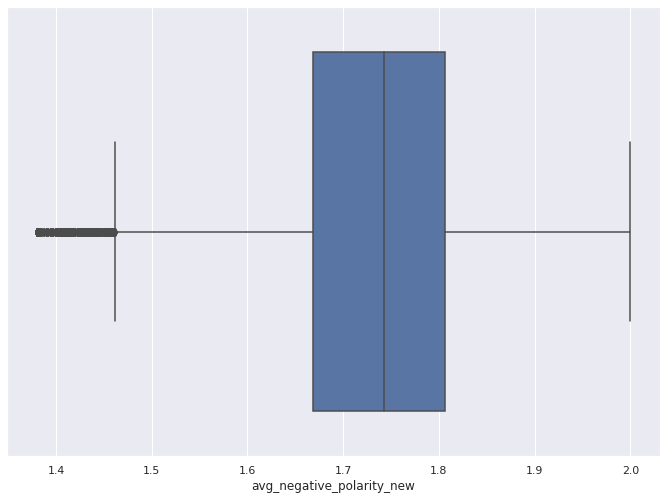

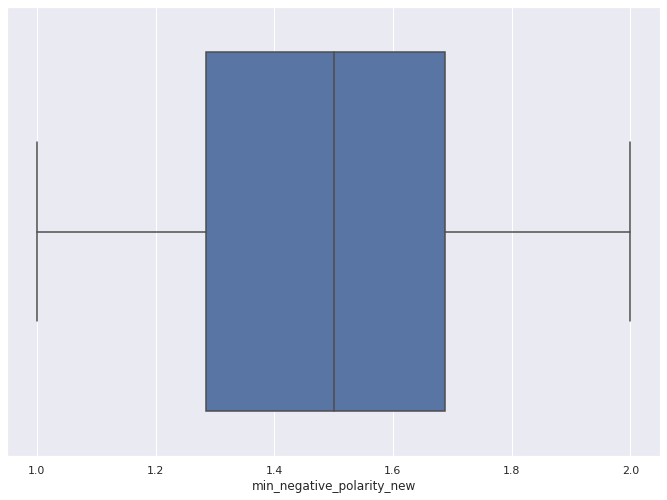

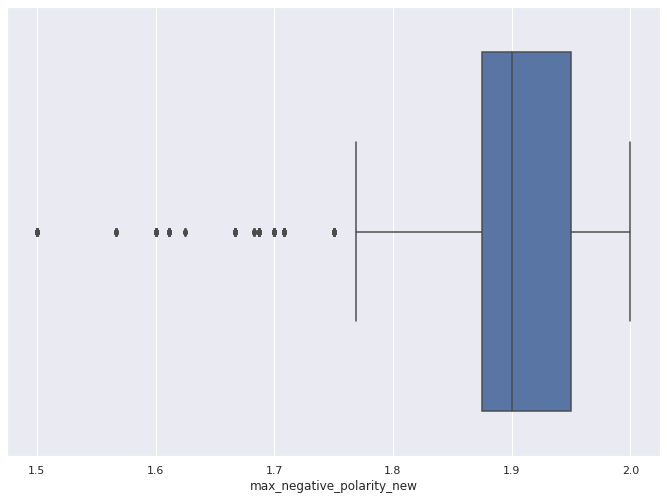

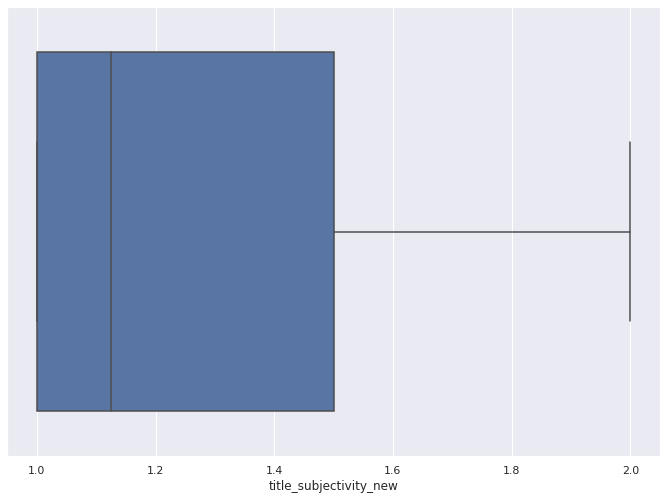

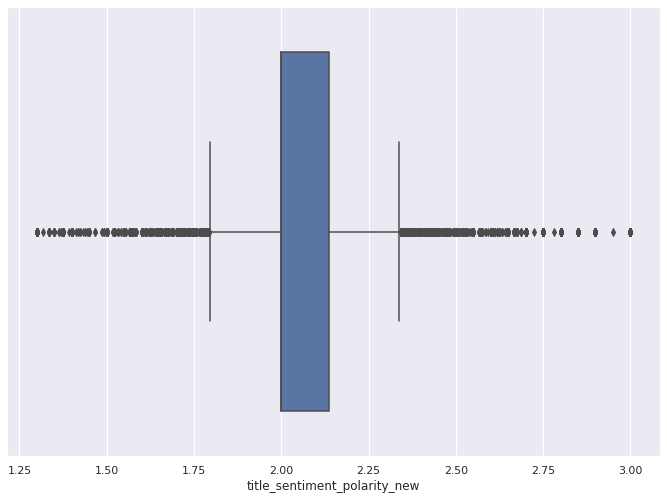

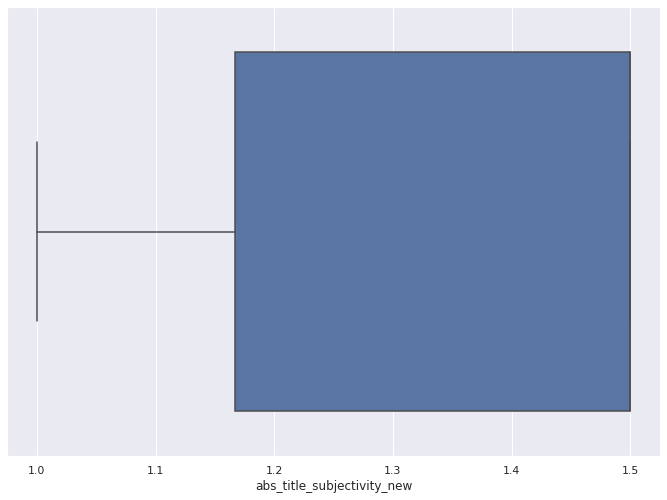

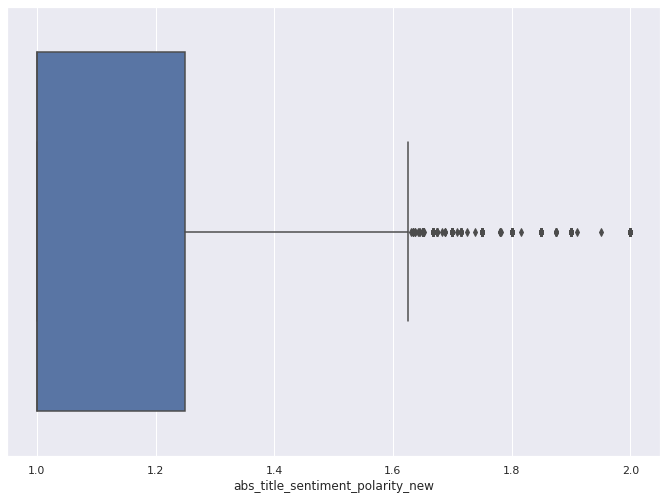

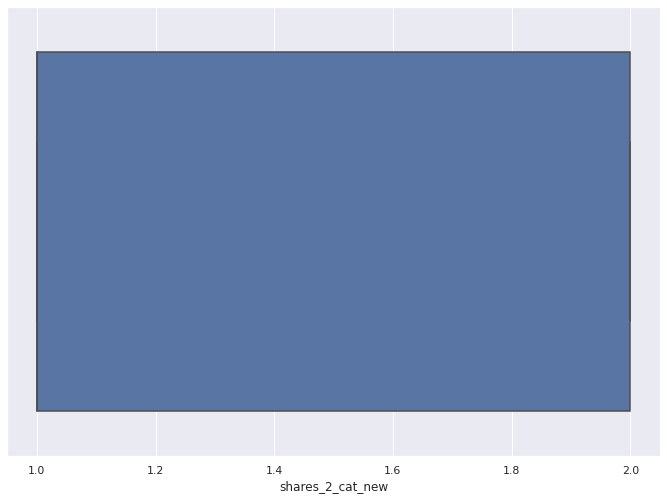

In [130]:
numerical_cols = ONP2_numerical_add.select_dtypes(['int64','float64']).columns
for i in range(len(numerical_cols)):
    sns.boxplot(ONP2_numerical_add[numerical_cols[i]])
    plt.show()

In [131]:
ONP2_numerical_add.shape

(38463, 43)

In [132]:
ONP2_numerical_add.drop(['shares_4_cat'], axis=1, inplace=True)

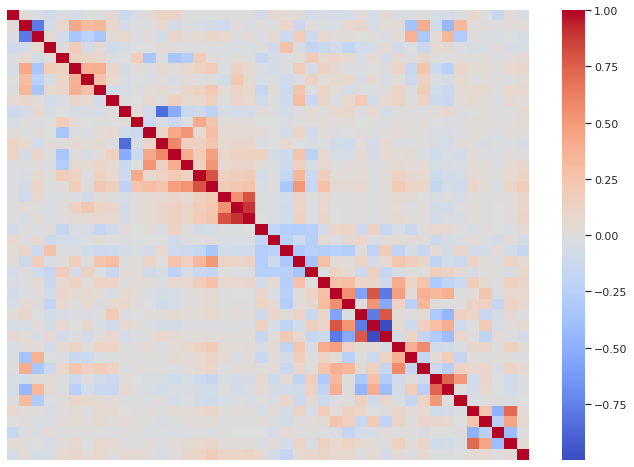

In [133]:
corr = ONP2_numerical_add.corr()
sns.heatmap(corr,  xticklabels=False, yticklabels=False, cmap="coolwarm")

In [134]:
# for a in range(len(ONP2_numerical_add.corr().columns)):
#     for b in range(a):
#         if(abs(ONP2_numerical_addm.corr().iloc[a,b])>0.7):
#             print(ONP2_numerical_add.corr().columns[a],"-", ONP2_numerical_add.corr().columns[b])
#             #print(df.corr().columns)

In [135]:
ONP2_numerical_add.drop(['self_reference_avg_sharess_new'], axis=1, inplace=True)
ONP2_numerical_add.drop(['avg_negative_polarity_new'], axis=1, inplace=True)
ONP2_numerical_add.drop(['avg_positive_polarity_new'], axis=1, inplace=True)

In [136]:
ONP2_numerical_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new',
       'shares_2_cat_new'],
  

In [137]:
# Drop features for categorical variables - Chi-square

In [138]:
from scipy.stats import chi2_contingency

In [139]:
def get_crosstabs(row, column, df, plot_data = False):
    '''
    Create and analyze an R x C contingency table for categorical data
    Optionally, plot the data
    INPUTS:
    row (str) : row name (should be a column in df)
    column (str) : column name (should be a column in df); will not be filtered by ignore_codes
    df (pandas dataframe) : data source for the above variables
    ignore_codes (list) : missing-data codes to exclude from the row values
    plot_data (boolean) : display a grouped countplot
    
    OUTPUTS:
    xtab (pandas dataframe) : crosstabulation of observed data
    expected (numpy array) : crosstabulation of expected data
    chi2 (float) : chi-squared value
    dof (int) : degrees of freedom for chi-squared test
    p_value (float): p-value for chi-squared test on contingency table
    '''    

    # plot if requested
    if plot_data:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.countplot(data=df, x=row, hue=column)  
        plt.xlabel(row)
        plt.ylabel('Count')
        plt.show()
        # doing this to keep from opening too many figs at once (eats memory)
        plt.close(fig);
      
    # create cross-tabulation
    xtab = pd.crosstab(df[row], df[column], margins = False)   
    print('observed data:\n', xtab)
    
    # analyze
    # don't generally use continuity correction for tables > 2 x 2; Rosner, Fundamentals of Biostatics, p. 394
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))
    
    return

In [140]:
ONP2_categorical.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [141]:
# Combining numeric features and catogorical features.

ONP_final=pd.concat([ONP2_numerical_add,ONP2_categorical],axis=1)

In [142]:
ONP_final.shape

(38463, 53)

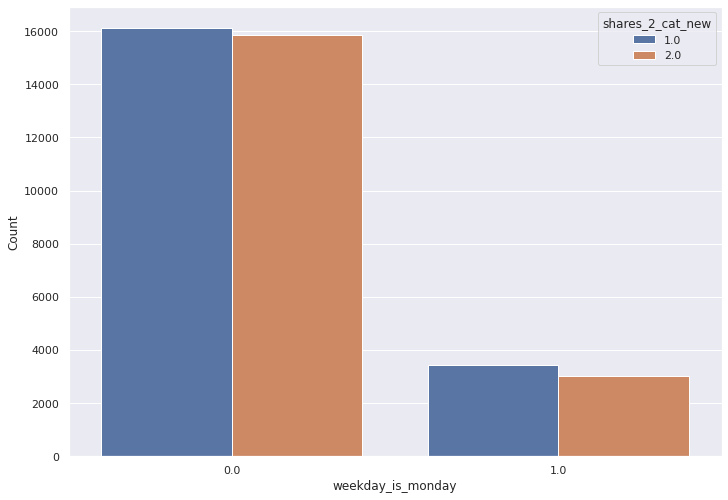

observed data:
 shares_2_cat_new     1.0    2.0
weekday_is_monday              
0.0                16116  15876
1.0                 3435   3036
expected data:
 [[16261.7474456 15730.2525544]
 [ 3289.2525544  3181.7474456]]
chi-squared value: 15.7911 for 1 dof; p-value = 0.0001



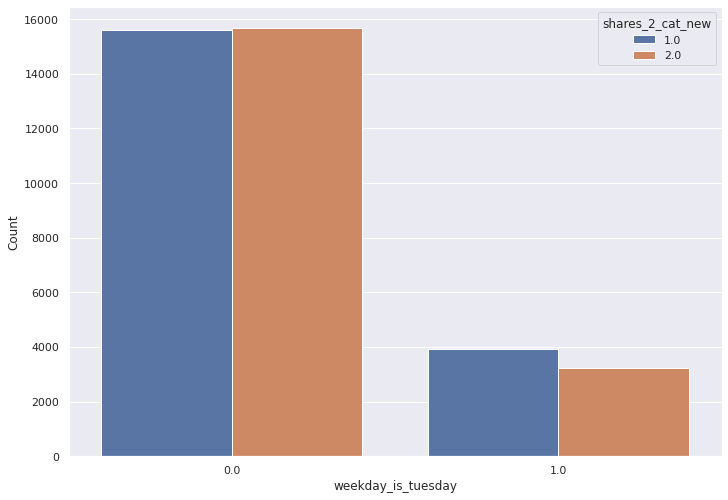

observed data:
 shares_2_cat_new      1.0    2.0
weekday_is_tuesday              
0.0                 15619  15673
1.0                  3932   3239
expected data:
 [[15905.93276655 15386.06723345]
 [ 3645.06723345  3525.93276655]]
chi-squared value: 56.4638 for 1 dof; p-value = 0.0000



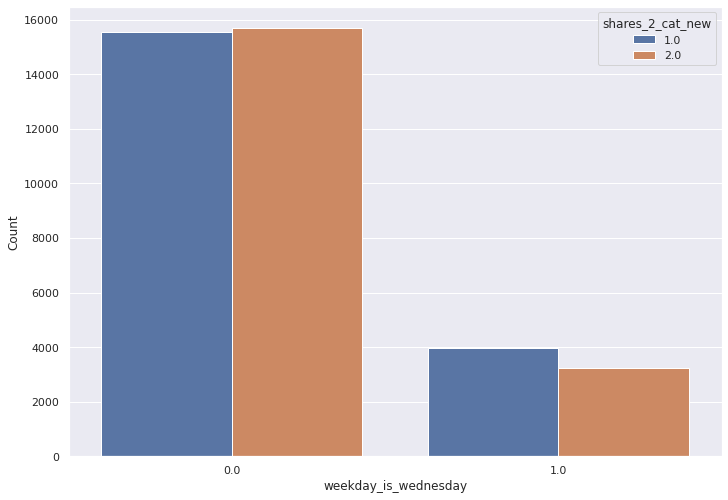

observed data:
 shares_2_cat_new        1.0    2.0
weekday_is_wednesday              
0.0                   15566  15692
1.0                    3985   3220
expected data:
 [[15888.65033929 15369.34966071]
 [ 3662.34966071  3542.65033929]]
chi-squared value: 71.1364 for 1 dof; p-value = 0.0000



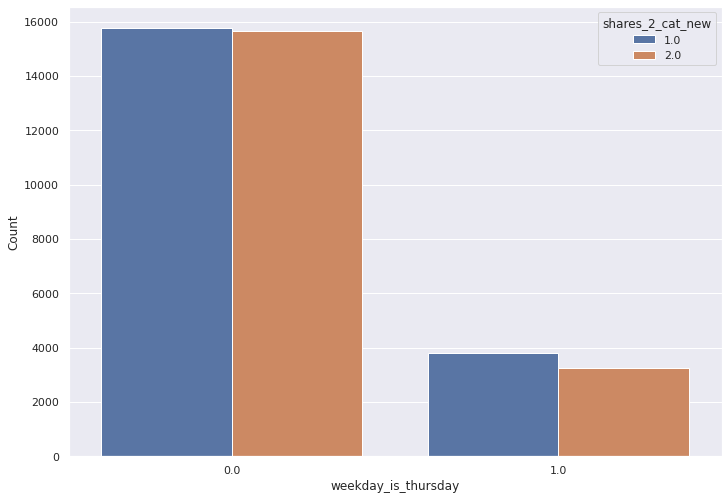

observed data:
 shares_2_cat_new       1.0    2.0
weekday_is_thursday              
0.0                  15762  15649
1.0                   3789   3263
expected data:
 [[15966.42126199 15444.57873801]
 [ 3584.57873801  3467.42126199]]
chi-squared value: 29.0323 for 1 dof; p-value = 0.0000



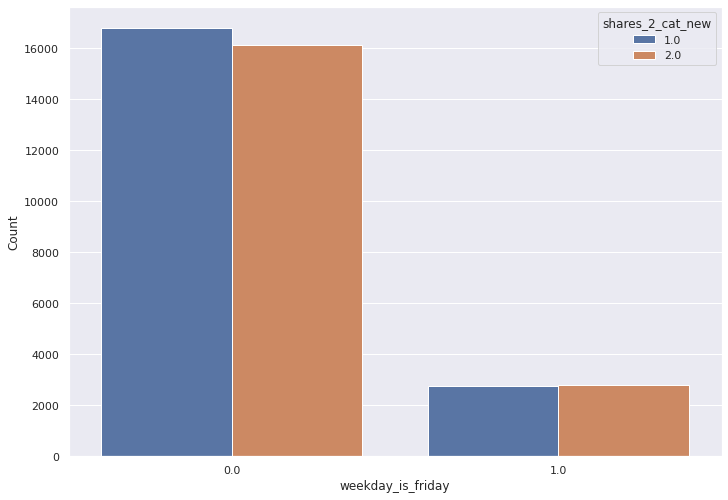

observed data:
 shares_2_cat_new     1.0    2.0
weekday_is_friday              
0.0                16795  16130
1.0                 2756   2782
expected data:
 [[16735.99758209 16189.00241791]
 [ 2815.00241791  2722.99758209]]
chi-squared value: 2.9382 for 1 dof; p-value = 0.0865



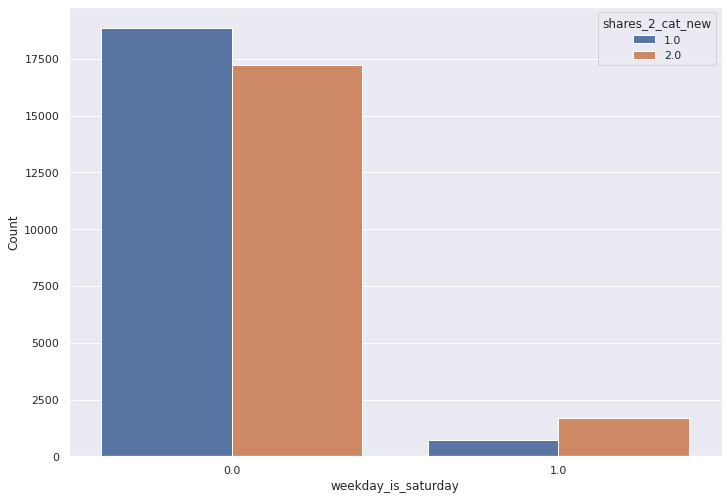

observed data:
 shares_2_cat_new       1.0    2.0
weekday_is_saturday              
0.0                  18848  17246
1.0                    703   1666
expected data:
 [[18346.82146478 17747.17853522]
 [ 1204.17853522  1164.82146478]]
chi-squared value: 452.0723 for 1 dof; p-value = 0.0000



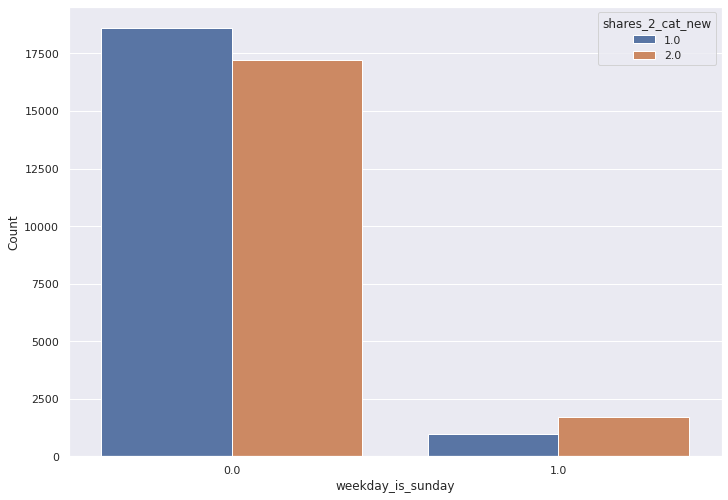

observed data:
 shares_2_cat_new     1.0    2.0
weekday_is_sunday              
0.0                18600  17206
1.0                  951   1706
expected data:
 [[18200.42913969 17605.57086031]
 [ 1350.57086031  1306.42913969]]
chi-squared value: 258.2637 for 1 dof; p-value = 0.0000



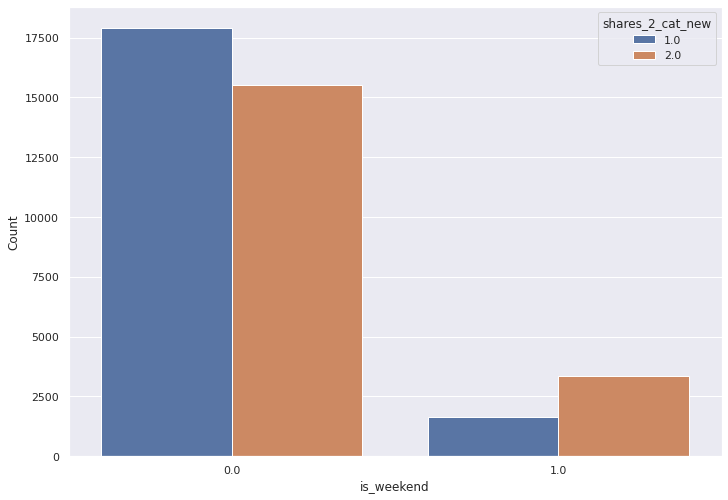

observed data:
 shares_2_cat_new    1.0    2.0
is_weekend                    
0.0               17897  15540
1.0                1654   3372
expected data:
 [[16996.25060448 16440.74939552]
 [ 2554.74939552  2471.25060448]]
chi-squared value: 742.9870 for 1 dof; p-value = 0.0000



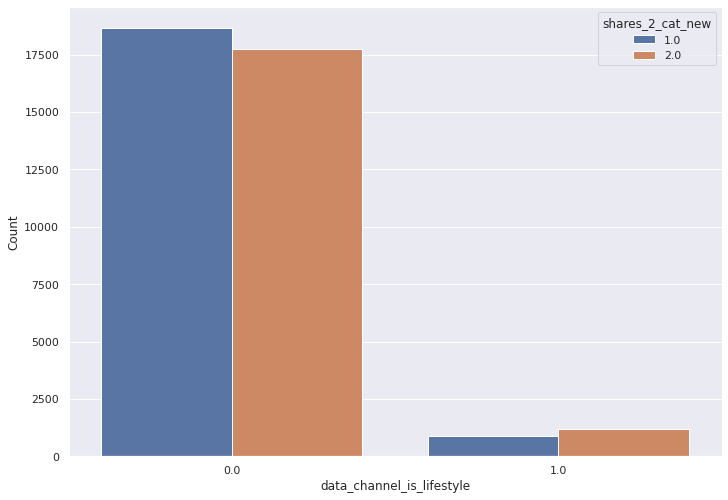

observed data:
 shares_2_cat_new             1.0    2.0
data_channel_is_lifestyle              
0.0                        18653  17733
1.0                          898   1179
expected data:
 [[18495.24701661 17890.75298339]
 [ 1055.75298339  1021.24701661]]
chi-squared value: 50.6766 for 1 dof; p-value = 0.0000



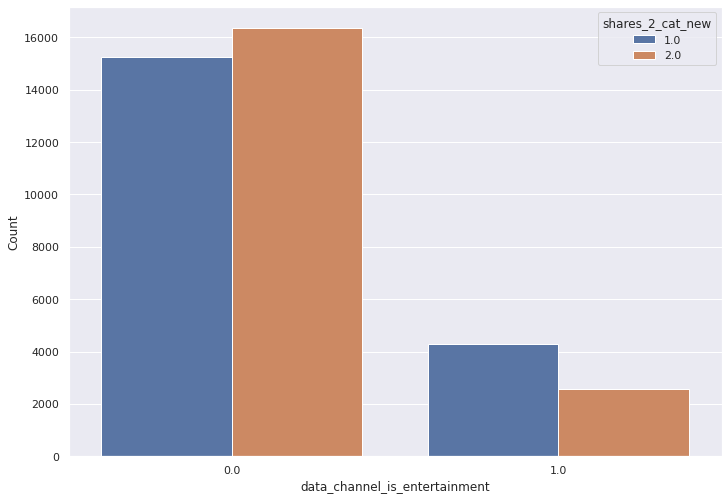

observed data:
 shares_2_cat_new                 1.0    2.0
data_channel_is_entertainment              
0.0                            15256  16351
1.0                             4295   2561
expected data:
 [[16066.04937212 15540.95062788]
 [ 3484.95062788  3371.04937212]]
chi-squared value: 466.0064 for 1 dof; p-value = 0.0000



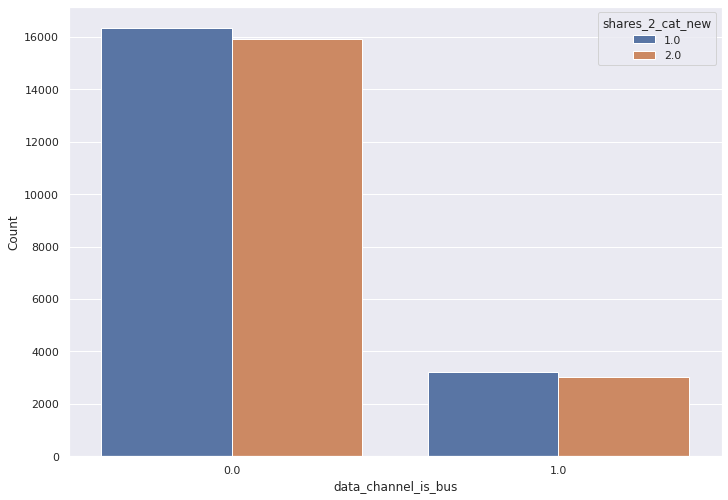

observed data:
 shares_2_cat_new       1.0    2.0
data_channel_is_bus              
0.0                  16330  15898
1.0                   3221   3014
expected data:
 [[16381.7078231 15846.2921769]
 [ 3169.2921769  3065.7078231]]
chi-squared value: 2.0477 for 1 dof; p-value = 0.1524



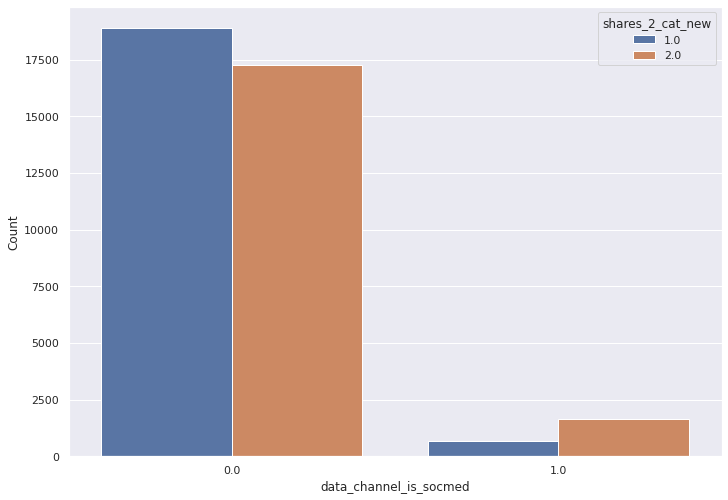

observed data:
 shares_2_cat_new          1.0    2.0
data_channel_is_socmed              
0.0                     18892  17260
1.0                       659   1652
expected data:
 [[18376.30325248 17775.69674752]
 [ 1174.69674752  1136.30325248]]
chi-squared value: 489.8685 for 1 dof; p-value = 0.0000



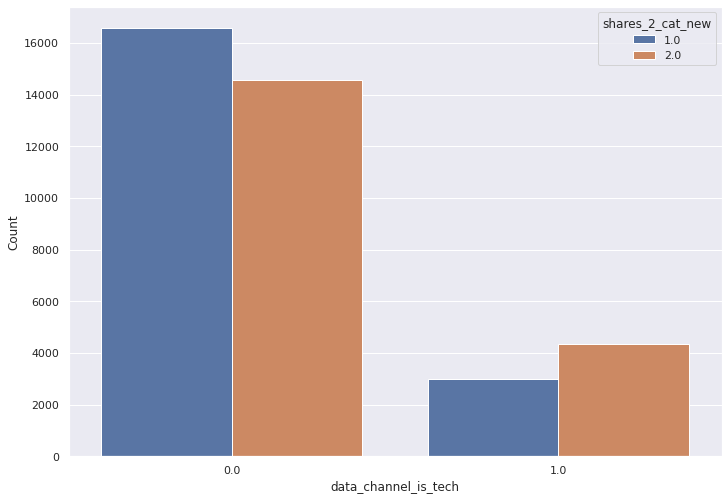

observed data:
 shares_2_cat_new        1.0    2.0
data_channel_is_tech              
0.0                   16568  14570
1.0                    2983   4342
expected data:
 [[15827.65353717 15310.34646283]
 [ 3723.34646283  3601.65353717]]
chi-squared value: 369.8237 for 1 dof; p-value = 0.0000



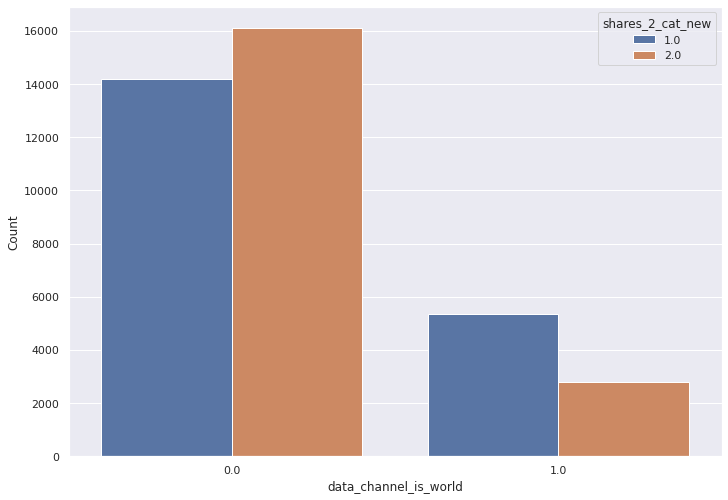

observed data:
 shares_2_cat_new         1.0    2.0
data_channel_is_world              
0.0                    14190  16105
1.0                     5361   2807
expected data:
 [[15399.15100226 14895.84899774]
 [ 4151.84899774  4016.15100226]]
chi-squared value: 909.2796 for 1 dof; p-value = 0.0000



In [143]:
col_list = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for cat_var in col_list:
  get_crosstabs(cat_var, 'shares_2_cat_new', ONP_final, plot_data = True)

In [144]:
ONP_final.drop(['weekday_is_saturday'], axis=1, inplace=True)
ONP_final.drop(['weekday_is_sunday'], axis=1, inplace=True)

In [145]:
ONP_final.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,num_keywords,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,kw_min_min_new,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,12.0,219.0,0.663594,4.680365,5.0,5.0,3.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,255.0,0.604743,4.913725,4.0,4.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.0,211.0,0.575130,4.393365,6.0,4.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9.0,531.0,0.503788,4.404896,7.0,10.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.0,1072.0,0.415646,4.682836,7.0,20.0,20.0,21.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [146]:
ONP_final['shares_2_cat_new'] = ONP_final['shares_2_cat_new'] -1 

In [147]:
ONP_final['shares_2_cat_new']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: shares_2_cat_new, Length: 38463, dtype: float64

## Classification Model :



1. Model-1: Baseline - Naive bayes

2. Model-2: KNN

3. Model-3: Logistic Regression

4. Model-4: Random Forest

In [151]:
ONP_2_cat = ONP_final.copy()

In [152]:
# Splitting 80:20 - Binary outcome shares 

modelscore=[]
X=ONP_2_cat.drop(['shares_2_cat_new'],axis=1)
y=ONP_2_cat['shares_2_cat_new']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [153]:
# Checking the training data 
X_train.shape

(30770, 50)

**Supervised Learning**

**All the models together** 

In [158]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the  training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    print(predictions_test)
    print(X_test)
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the training samples
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the training samples
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the training samples
    results['auc_train'] = roc_auc_score(y_train,predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    
    # Return the results
    cm=confusion_matrix(y_test,predictions_test)
    ONP_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(ONP_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

    from sklearn import metrics
    auc = metrics.roc_auc_score(y_test,predictions_test)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_test,pos_label = 1.0)
    plt.figure(figsize=(8,6), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    
    
    plt.show()
    return results

[0. 0. 1. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

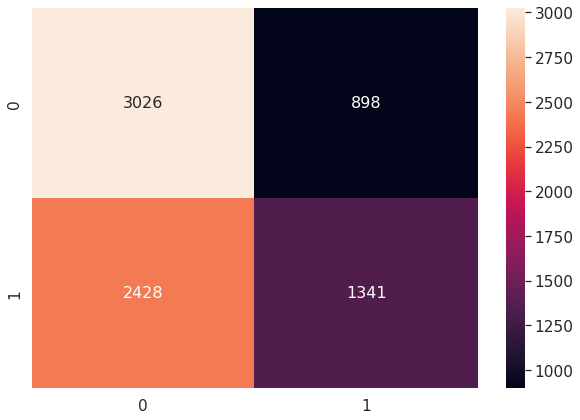

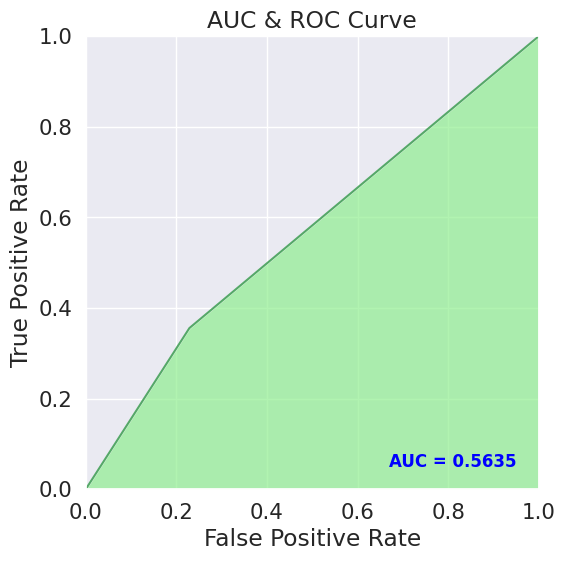

[0. 0. 0. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

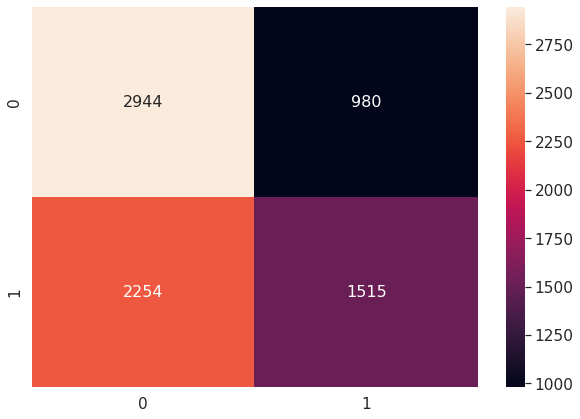

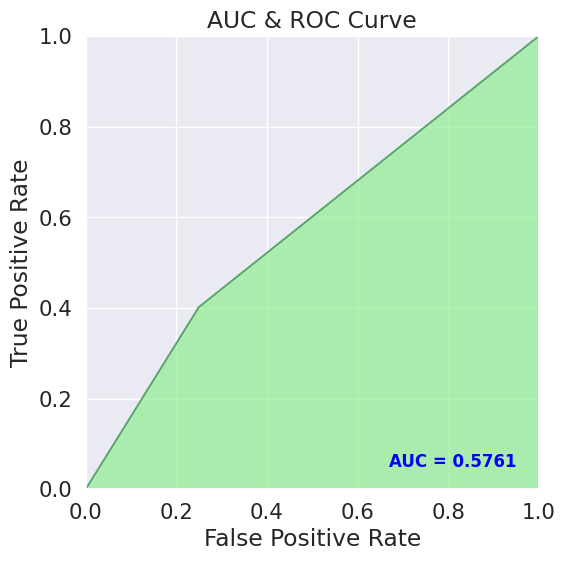

[0. 0. 0. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

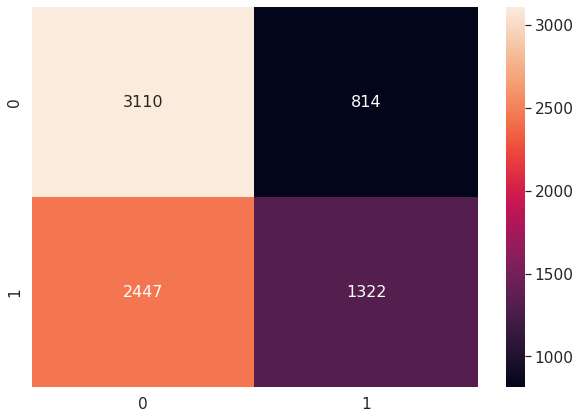

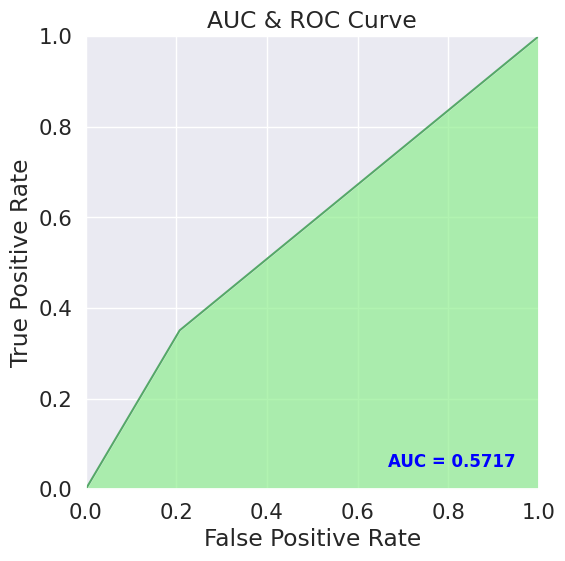

[0. 1. 1. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

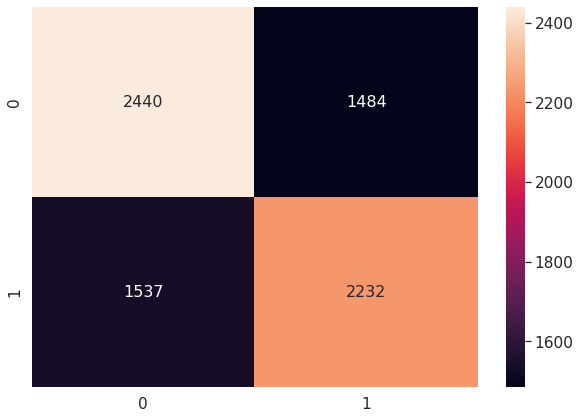

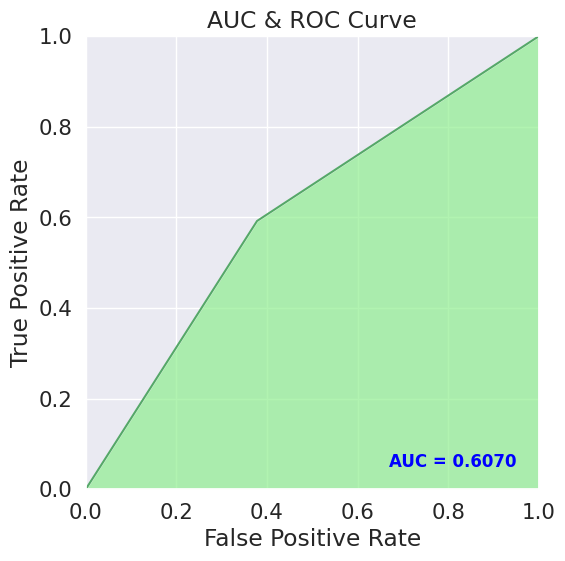

[1. 1. 1. ... 1. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

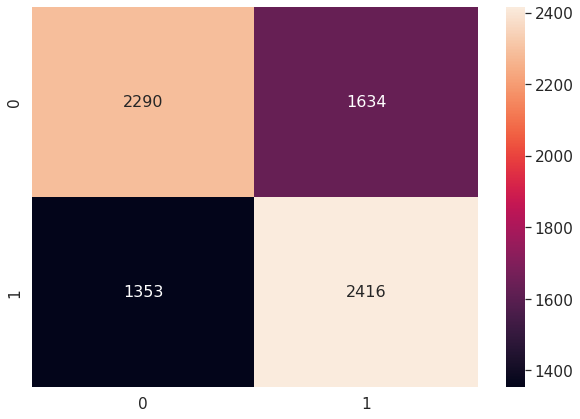

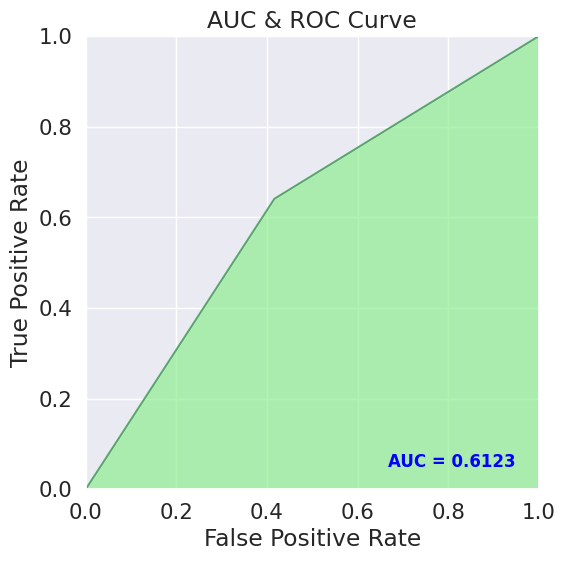

[0. 1. 0. ... 0. 0. 0.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

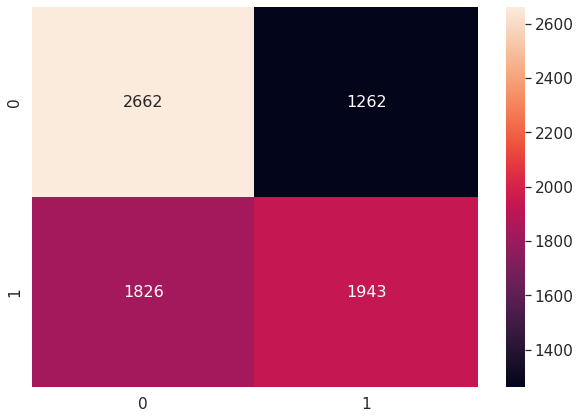

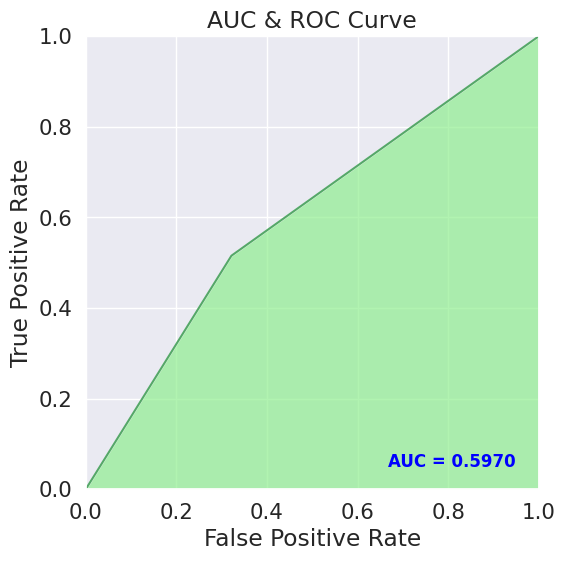

[0. 1. 0. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

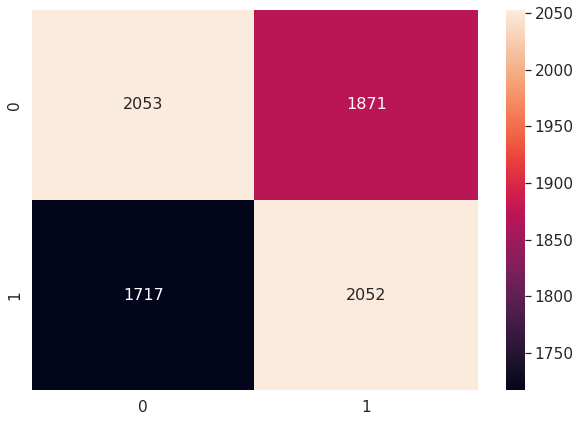

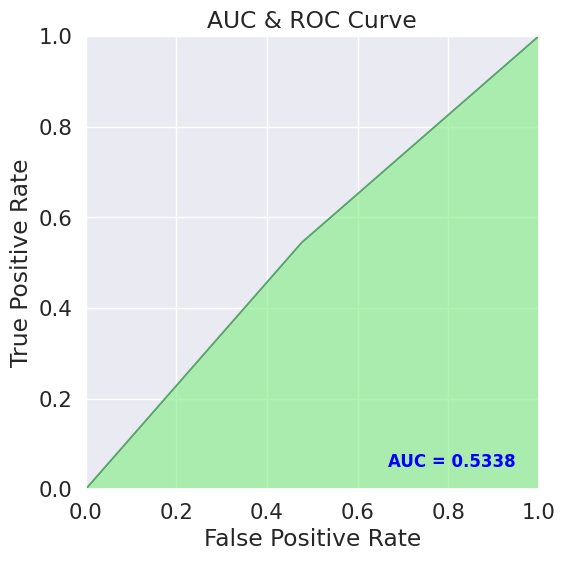

[0. 1. 1. ... 1. 0. 0.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

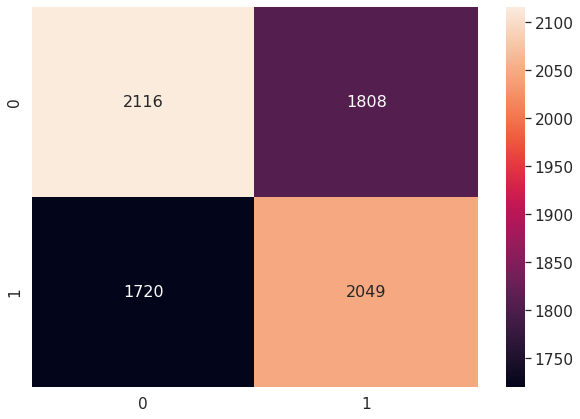

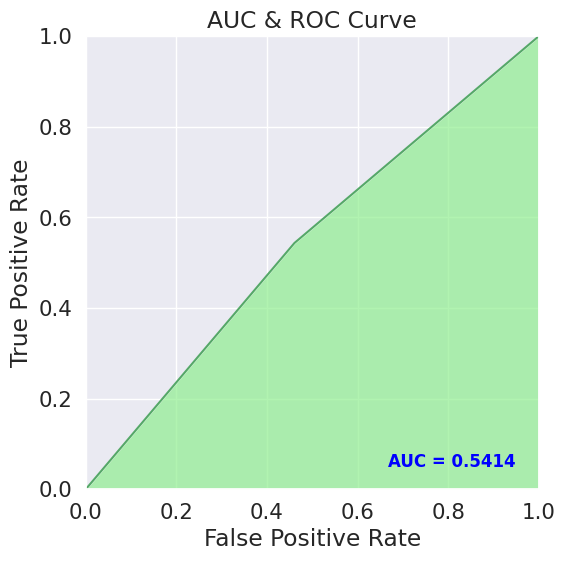

[0. 0. 0. ... 1. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

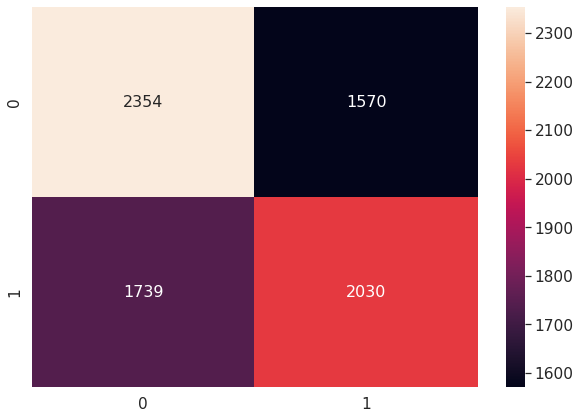

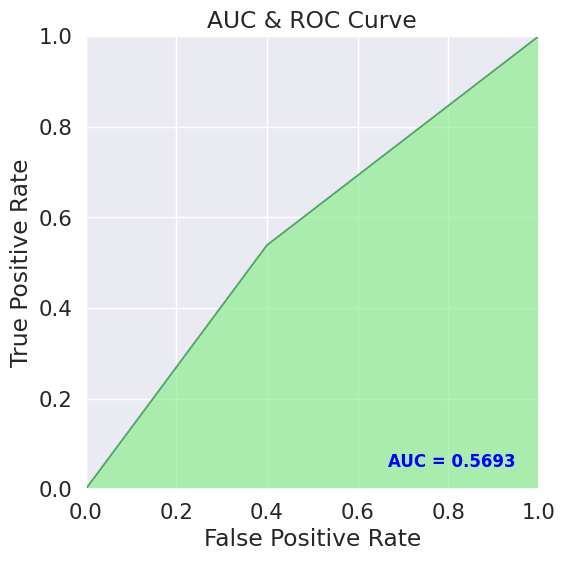

[0. 0. 1. ... 0. 1. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

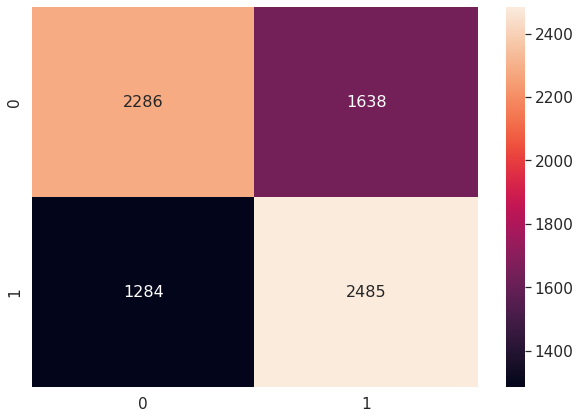

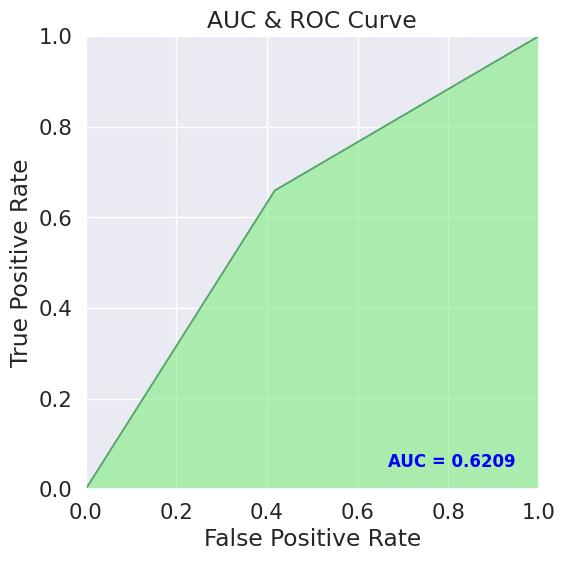

[1. 1. 1. ... 0. 0. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

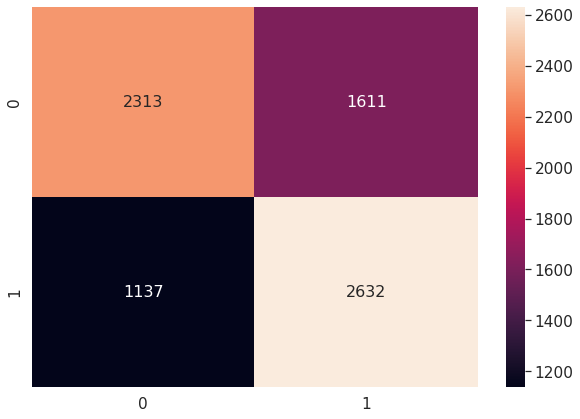

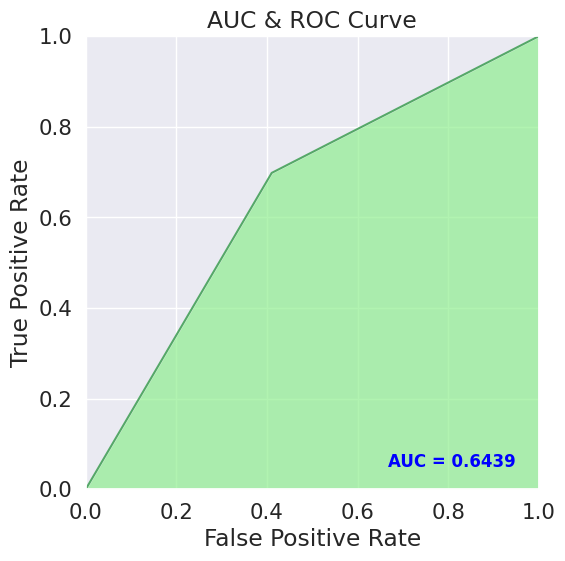

[1. 0. 1. ... 0. 1. 1.]
       n_tokens_title  n_tokens_content  n_unique_tokens  \
12356            11.0            1659.0         0.342752   
6011             12.0             553.0         0.520796   
7931              9.0             508.0         0.556680   
2445             10.0             144.0         0.707143   
18690            11.0             317.0         0.536977   
...               ...               ...              ...   
10447            14.0             395.0         0.507692   
7722              6.0             275.0         0.560886   
31571            12.0             443.0         0.590164   
13879             9.0             325.0         0.624585   
22057            10.0            1312.0         0.342857   

       average_token_length  num_keywords  num_hrefs_new  num_self_hrefs_new  \
12356              4.426763           9.0           15.0                 7.0   
6011               4.622061           5.0            4.0                 3.0   
7931           

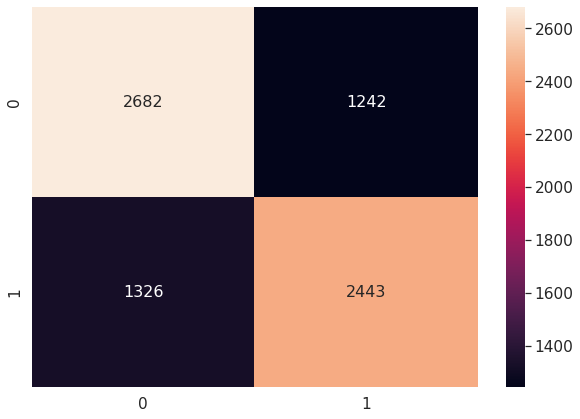

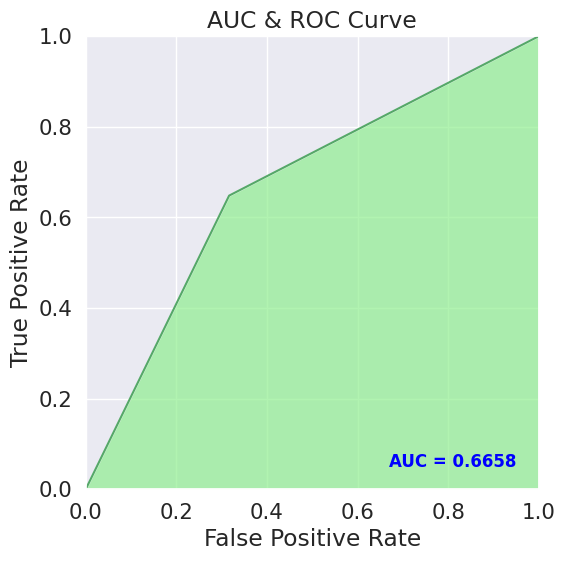

In [159]:
# Naive Bayes
# Logistic Regression 
# K Nearest Neighbors 
# Random Forest


# Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=100,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf_D = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_C:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)            
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen

#evaluate(results,'performance_comparison.pdf')

Random Forest has the best accuracy, so lets perform hyperparameter tuning on random forests

In [160]:
from sklearn.ensemble import RandomForestClassifier

nns = [1, 5, 10, 50]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50,
                                 random_state=0)
    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test))


In [161]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50,
                             random_state=0)
clf.fit(X_train, y_train)  

# predict the result
y_pred = clf.predict(X_test)
print ("Random Forest Classifer Result")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")


Random Forest Classifer Result
Performance - 66.800987911088%


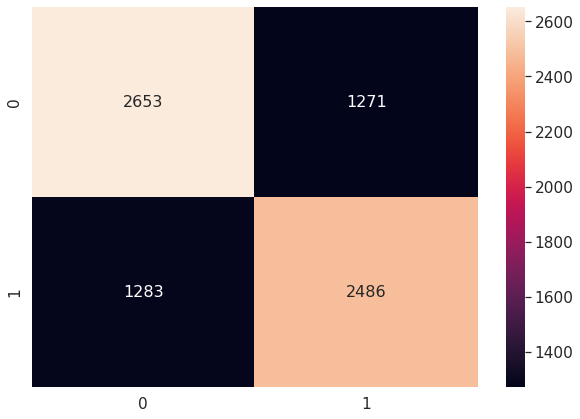

In [162]:
# Return the results
cm=confusion_matrix(y_test, y_pred)
ONP_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(ONP_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

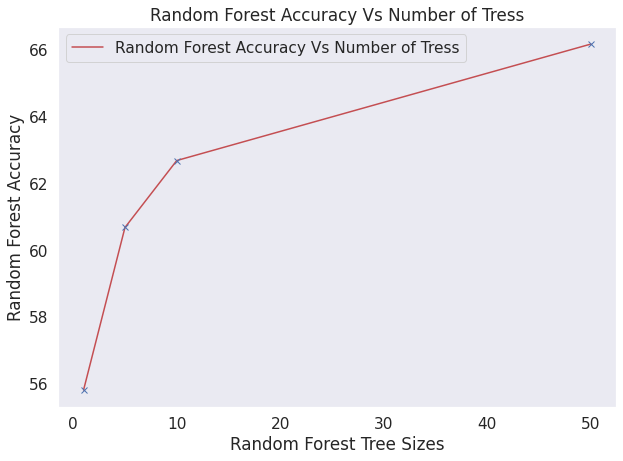

In [163]:
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

### Feature Importance on the final Model - Logsitic Regression

In [164]:
clf_B

LogisticRegression(random_state=100)

In [165]:
print(clf_B.coef_)
print(clf_B.intercept_)

[[-5.18930988e-07  6.60565930e-05 -3.66417330e-08 -1.55572322e-07
   1.73648934e-07  2.25233101e-06  2.30763624e-07  1.00835576e-06
  -1.39381826e-07 -1.62385873e-06 -1.23308713e-06 -2.44927096e-06
  -1.17514757e-06 -4.15015545e-07  1.38012679e-04  6.89956648e-06
   2.18879894e-04  1.50060194e-05  8.37165382e-06  3.09703178e-08
  -8.64197778e-08 -1.40944163e-07 -3.61569913e-08  6.94945018e-08
  -1.84216230e-08 -2.07604597e-08 -2.48761764e-08 -2.87315240e-08
  -1.39793958e-08 -6.74432626e-08 -3.68457980e-08 -1.45197686e-08
  -4.49718760e-08 -4.96529897e-08 -9.88191597e-09 -1.97350843e-08
  -3.19525483e-08 -1.21956979e-08 -2.96171877e-08 -5.51504725e-08
  -6.27818719e-08 -4.13104390e-08  1.17546913e-08  1.49939538e-07
   2.03961092e-08 -1.39621050e-07  5.54598034e-10  8.36469565e-08
   1.38487842e-07 -1.64279353e-07]]
[-2.7165742e-08]


In [169]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf_B.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [170]:
print(importances)

                           Attribute    Importance
16                    kw_avg_avg_new  2.188799e-04
14                    kw_min_avg_new  1.380127e-04
1                   n_tokens_content  6.605659e-05
17     self_reference_min_shares_new  1.500602e-05
18     self_reference_max_shares_new  8.371654e-06
15                    kw_max_avg_new  6.899566e-06
5                      num_hrefs_new  2.252331e-06
7                       num_imgs_new  1.008356e-06
6                 num_self_hrefs_new  2.307636e-07
4                       num_keywords  1.736489e-07
43                        is_weekend  1.499395e-07
48              data_channel_is_tech  1.384878e-07
47            data_channel_is_socmed  8.364696e-08
23                        LDA_04_new  6.949450e-08
19                        LDA_00_new  3.097032e-08
44         data_channel_is_lifestyle  2.039611e-08
42                 weekday_is_friday  1.175469e-08
46               data_channel_is_bus  5.545980e-10
34            title_subjectivit

In [171]:
importances['Importance_abs'] = importances['Importance'].abs()

In [172]:
sorted_importance = importances.sort_values(by=['Importance_abs'], ascending=False)

In [173]:
sorted_importance

,Attribute,Importance,Importance_abs
16,kw_avg_avg_new,2.188799e-04,2.188799e-04
14,kw_min_avg_new,1.380127e-04,1.380127e-04
1,n_tokens_content,6.605659e-05,6.605659e-05
17,self_reference_min_shares_new,1.500602e-05,1.500602e-05
18,self_reference_max_shares_new,8.371654e-06,8.371654e-06
15,kw_max_avg_new,6.899566e-06,6.899566e-06
11,kw_min_max_new,-2.449271e-06,2.449271e-06
5,num_hrefs_new,2.252331e-06,2.252331e-06
9,kw_min_min_new,-1.623859e-06,1.623859e-06
10,kw_max_min_new,-1.233087e-06,1.233087e-06


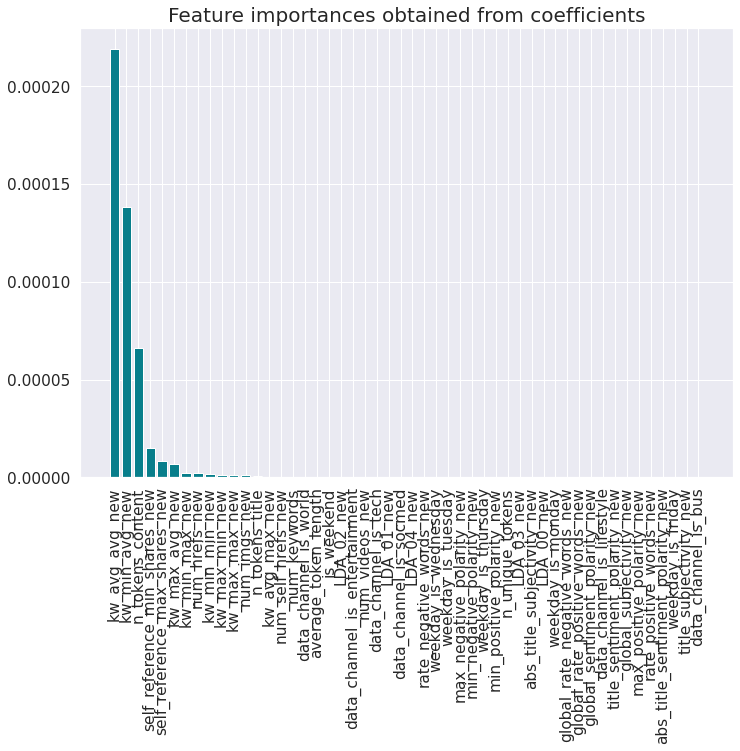

In [174]:
plt.bar(x=sorted_importance['Attribute'], height=sorted_importance['Importance_abs'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Random Forest has the best result for this classification task reaching an accuracy of 66%. Due to the nature of Random forest being able to set different number of decision trees, features, tree depth, splitting criteria, and others it tends to require a lot of parameter tuning.

In this project, we analyzed the given online news data set and discovered some interesting patterns that good articles share.

In the first step, we used a quantitative analysis to confirm our initial hypothesis by performing univariate analysis using scatter plots, boxplots, and barplots of each feature with the shares feature.

The Random Forest machine learning model performed best, achieving an accuracy of 66.5 percent on the testing data-set. One reason for this low accuracy score is the large variance in the data set, as well as the imbalance in the class distribution, which causes the prediction models to be biased towards popularity classes with more articles.

## PCA - Supervised learning

In [ ]:
ONP_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new',
       'shares_2_cat_new', 'we

In [ ]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

X = ONP_final.copy()


In [ ]:
X.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new',
       'shares_2_cat_new', 'we

In [ ]:
y = X.pop('shares_2_cat_new')
X = X.loc[:, features]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-0.799826,-1.787904,-1.026730,2.692579,-3.334802,-0.541303,0.148724,-1.343208,-0.064557,1.246035,...,0.156480,0.426116,0.232460,2.325329,0.036879,-0.003250,0.410794,-0.001327,-0.001867,4.935467e-14
1,-1.048331,-3.802852,-1.501580,-0.744714,-2.837024,-2.315348,0.907703,1.089301,0.210366,0.955027,...,-0.802881,0.324634,-0.217520,1.953525,-0.089861,0.062087,0.085686,-0.003275,-0.000264,-5.198291e-15
2,-3.427894,-2.471087,0.106692,0.932506,-1.498620,-2.236175,0.273767,0.245782,0.182498,-1.439733,...,-1.495998,-0.286145,-0.777621,2.037533,0.032982,0.076323,0.102717,0.001254,0.000861,-4.150765e-15
3,0.710323,-2.542589,0.446486,2.380525,-1.750397,-1.652566,1.189794,-2.079508,0.211091,0.255424,...,-1.255639,-0.337248,0.166974,2.333118,-0.060065,-0.025950,0.356889,0.001114,-0.001636,-1.732770e-15
4,-3.938330,-1.281761,5.268505,1.124500,0.089635,-0.372454,-1.693243,-0.399765,1.812014,2.103095,...,-0.482274,-0.108371,-0.421546,2.195650,0.361971,0.145109,0.069173,0.001460,0.000195,-6.728815e-16


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
n_tokens_title,0.052420,0.039758,-0.003834,0.001073,-0.064615,0.113867,-0.110292,-0.175250,-0.137950,0.052071,...,-0.011712,0.010679,0.004984,-0.004396,-0.003759,-0.009847,0.000115,0.000758,-0.000017,-1.024425e-16
n_tokens_content,0.040609,0.067571,0.443069,-0.168117,-0.081291,-0.047431,-0.002989,-0.031522,0.010418,-0.013617,...,-0.012557,0.734216,-0.075991,-0.008306,-0.003432,-0.018214,0.003153,-0.002028,-0.000313,-7.784327e-17
n_unique_tokens,-0.033945,-0.014989,-0.420761,0.192488,0.035757,0.025120,0.029688,0.005903,0.002423,-0.008341,...,-0.012993,0.614892,-0.088094,-0.014460,0.003920,-0.001706,-0.015655,-0.002894,-0.000313,-6.348390e-17
average_token_length,0.083370,-0.060903,-0.039798,-0.126600,0.052954,0.183820,0.256671,0.091738,0.076036,0.140471,...,0.002420,0.004331,0.002015,-0.004687,-0.006752,0.002837,-0.005043,0.000860,-0.000083,-1.020607e-16
num_keywords,-0.060928,-0.025049,0.175327,0.159208,0.220751,0.081689,0.126260,0.103650,-0.335429,0.005862,...,0.022296,-0.020884,-0.008719,0.073061,0.008117,0.042081,-0.006414,-0.000190,-0.001078,-4.465818e-17
num_hrefs_new,0.001015,0.162640,0.280083,-0.101808,0.062973,0.024270,0.189349,0.069127,0.110643,0.153724,...,0.013482,-0.091268,0.049889,0.019586,-0.010005,0.034941,-0.007229,0.000402,0.000059,-3.388628e-17
num_self_hrefs_new,-0.054358,0.073503,0.240915,-0.055264,0.086125,-0.087174,-0.049346,-0.045965,0.128605,0.292705,...,0.011220,-0.042890,-0.002892,-0.017057,-0.004688,-0.021294,-0.005564,0.000089,0.000026,-3.878901e-17
num_imgs_new,-0.001950,0.176929,0.227190,-0.007120,0.111189,-0.001112,0.090205,-0.039548,0.129490,0.250884,...,0.030906,0.001791,-0.002025,0.016617,0.008384,0.026587,-0.012469,-0.000721,-0.000286,4.690575e-17
num_videos_new,0.037673,0.161994,0.015960,0.075620,-0.081438,-0.059563,0.030441,-0.056647,0.072774,-0.158155,...,-0.019744,-0.057407,-0.019787,-0.010374,0.032716,-0.008216,-0.001196,-0.000099,-0.000050,-1.874503e-17
kw_min_min_new,-0.089122,-0.150332,0.033216,0.297121,-0.161994,-0.171968,0.197691,0.202744,0.309622,0.015018,...,0.221745,-0.063915,0.004746,-0.576937,0.010455,0.002954,0.002490,0.000327,-0.000034,8.127083e-17


In [ ]:
pca.get_covariance()

array([[ 1.000026  ,  0.02558943, -0.02587048, ..., -0.090751  ,
        -0.04491384,  0.05266477],
       [ 0.02558943,  1.000026  , -0.7868163 , ...,  0.02880245,
         0.01020361,  0.06638298],
       [-0.02587048, -0.7868163 ,  1.000026  , ..., -0.02475817,
        -0.06797347, -0.10469297],
       ...,
       [-0.090751  ,  0.02880245, -0.02475817, ...,  1.000026  ,
        -0.12263193, -0.13128572],
       [-0.04491384,  0.01020361, -0.06797347, ..., -0.12263193,
         1.000026  , -0.2518501 ],
       [ 0.05266477,  0.06638298, -0.10469297, ..., -0.13128572,
        -0.2518501 ,  1.000026  ]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([8.99839805e-02, 8.28226754e-02, 6.74651587e-02, 5.41420262e-02,
       4.82234927e-02, 4.37421040e-02, 4.04883530e-02, 3.90067960e-02,
       3.20687633e-02, 2.89090711e-02, 2.82041840e-02, 2.55156530e-02,
       2.46394321e-02, 2.45461996e-02, 2.41875922e-02, 2.39161026e-02,
       2.32307697e-02, 2.23052237e-02, 2.16944784e-02, 2.00717722e-02,
       1.91816616e-02, 1.85619161e-02, 1.70307882e-02, 1.63256102e-02,
       1.42267107e-02, 1.40051174e-02, 1.25044999e-02, 1.22079680e-02,
       1.13859438e-02, 1.03077928e-02, 9.98003640e-03, 9.51884394e-03,
       8.75851723e-03, 8.52250505e-03, 7.50677162e-03, 7.27076963e-03,
       6.18811396e-03, 4.88897831e-03, 4.79113615e-03, 4.56767676e-03,
       3.82420725e-03, 3.65613025e-03, 3.20060267e-03, 2.58201110e-03,
       1.44842038e-03, 1.39740103e-03, 9.64137473e-04, 3.06388512e-05,
       1.26503057e-06, 1.77462111e-32])

Text(0, 0.5, 'Cumulative explained variance')

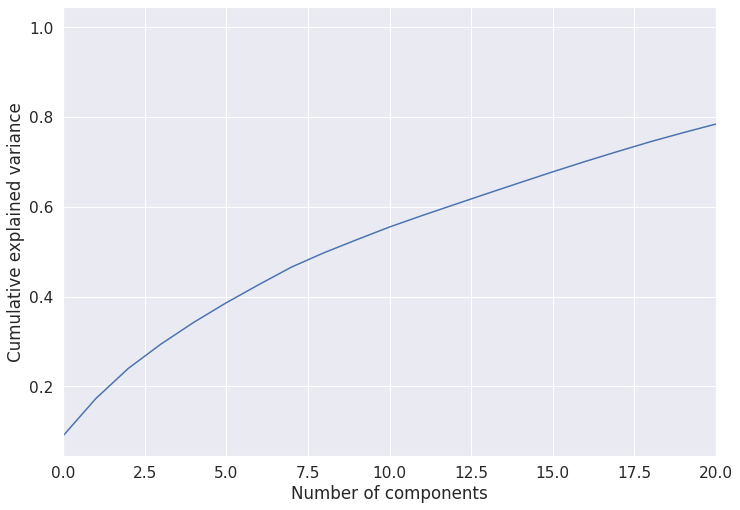

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Conclusion